In [ ]:
import pandas as pd
import ast
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from IPython.display import SVG
from IPython.display import display
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [ ]:
# Making the files available for Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Upload data
train_data = pd.read_csv("/content/gdrive/MyDrive/ML Project/train.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/ML Project/test.csv")
samplesubmission = pd.read_csv("/content/gdrive/MyDrive/ML Project/samplesubmission.csv")


In [ ]:
train_data

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,660160,USA,24531381,AfricanAmerican,Female,[80-90),?,MC,0,1,...,786,250,9,NaN,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
71232,826429,USA,4663818,AfricanAmerican,Female,[70-80),?,?,0,0,...,197,V66,6,NaN,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
71233,332030,USA,23397147,Caucasian,Female,[60-70),?,?,0,2,...,491,276,9,>300,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
71234,757560,USA,52161750,Caucasian,Male,[60-70),?,BC,0,0,...,157,250.8,5,NaN,NaN,Ch,Yes,"['glyburide', 'insulin']",No,No


# Data Exploration

In [ ]:
train_data.describe()

,encounter_id,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
count,71236.000000,7.123600e+04,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,548798.623716,5.430228e+07,0.369588,0.196249,0.640154,99.611222,4.391024,43.095654,1.340923,15.995452,7.421023
std,259704.723154,3.879585e+07,1.287469,0.910854,1.267271,23.040521,2.988739,19.642919,1.706664,8.122347,1.937809
min,100000.000000,1.350000e+02,0.000000,0.000000,0.000000,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,323118.500000,2.339651e+07,0.000000,0.000000,0.000000,80.000000,2.000000,31.000000,0.000000,10.000000,6.000000
50%,548370.000000,4.530563e+07,0.000000,0.000000,0.000000,100.000000,4.000000,44.000000,1.000000,15.000000,8.000000
75%,774058.500000,8.755837e+07,0.000000,0.000000,1.000000,119.000000,6.000000,57.000000,2.000000,20.000000,9.000000
max,999980.000000,1.895026e+08,42.000000,76.000000,21.000000,139.000000,14.000000,121.000000,6.000000,75.000000,16.000000


In [ ]:
test_data.describe()

,encounter_id,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
count,30530.000000,3.053000e+04,30530.000000,30530.000000,30530.000000,30530.000000,30530.000000,30530.000000,30530.000000,30530.000000,30530.000000
mean,550354.535113,5.439602e+07,0.368818,0.201539,0.624861,99.633180,4.407566,43.095611,1.336947,16.083426,7.426302
std,258945.047642,3.846377e+07,1.218842,0.974719,1.252473,23.032567,2.976634,19.747857,1.703830,8.139532,1.923772
min,100060.000000,3.780000e+02,0.000000,0.000000,0.000000,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,326864.000000,2.346142e+07,0.000000,0.000000,0.000000,80.000000,2.000000,32.000000,0.000000,10.000000,6.000000
50%,553228.000000,4.589360e+07,0.000000,0.000000,0.000000,100.000000,4.000000,44.000000,1.000000,15.000000,8.000000
75%,773081.250000,8.749489e+07,0.000000,0.000000,1.000000,119.000000,6.000000,57.000000,2.000000,20.000000,9.000000
max,999944.000000,1.894815e+08,40.000000,64.000000,16.000000,139.000000,14.000000,132.000000,6.000000,81.000000,16.000000


In [ ]:
# Display data types and unique values for each column
print("Data Types and Unique Values:")
print(train_data.dtypes)
print("\n")
print("Number of Unique Values:")
print(train_data.nunique())


Data Types and Unique Values:
encounter_id                              int64
country                                  object
patient_id                                int64
race                                     object
gender                                   object
age                                      object
weight                                   object
payer_code                               object
outpatient_visits_in_previous_year        int64
emergency_visits_in_previous_year         int64
inpatient_visits_in_previous_year         int64
admission_type                           object
medical_specialty                        object
average_pulse_bpm                         int64
discharge_disposition                    object
admission_source                         object
length_of_stay_in_hospital                int64
number_lab_tests                          int64
non_lab_procedures                        int64
number_of_medications                     int64
primary_di

In [ ]:
# Display data types and unique values for Test Data
print("Data Types and Unique Values:")
print(test_data.dtypes)
print("\n")
print("Number of Unique Values:")
print(test_data.nunique())

Data Types and Unique Values:
encounter_id                              int64
country                                  object
patient_id                                int64
race                                     object
gender                                   object
age                                      object
weight                                   object
payer_code                               object
outpatient_visits_in_previous_year        int64
emergency_visits_in_previous_year         int64
inpatient_visits_in_previous_year         int64
admission_type                           object
medical_specialty                        object
average_pulse_bpm                         int64
discharge_disposition                    object
admission_source                         object
length_of_stay_in_hospital                int64
number_lab_tests                          int64
non_lab_procedures                        int64
number_of_medications                     int64
primary_di

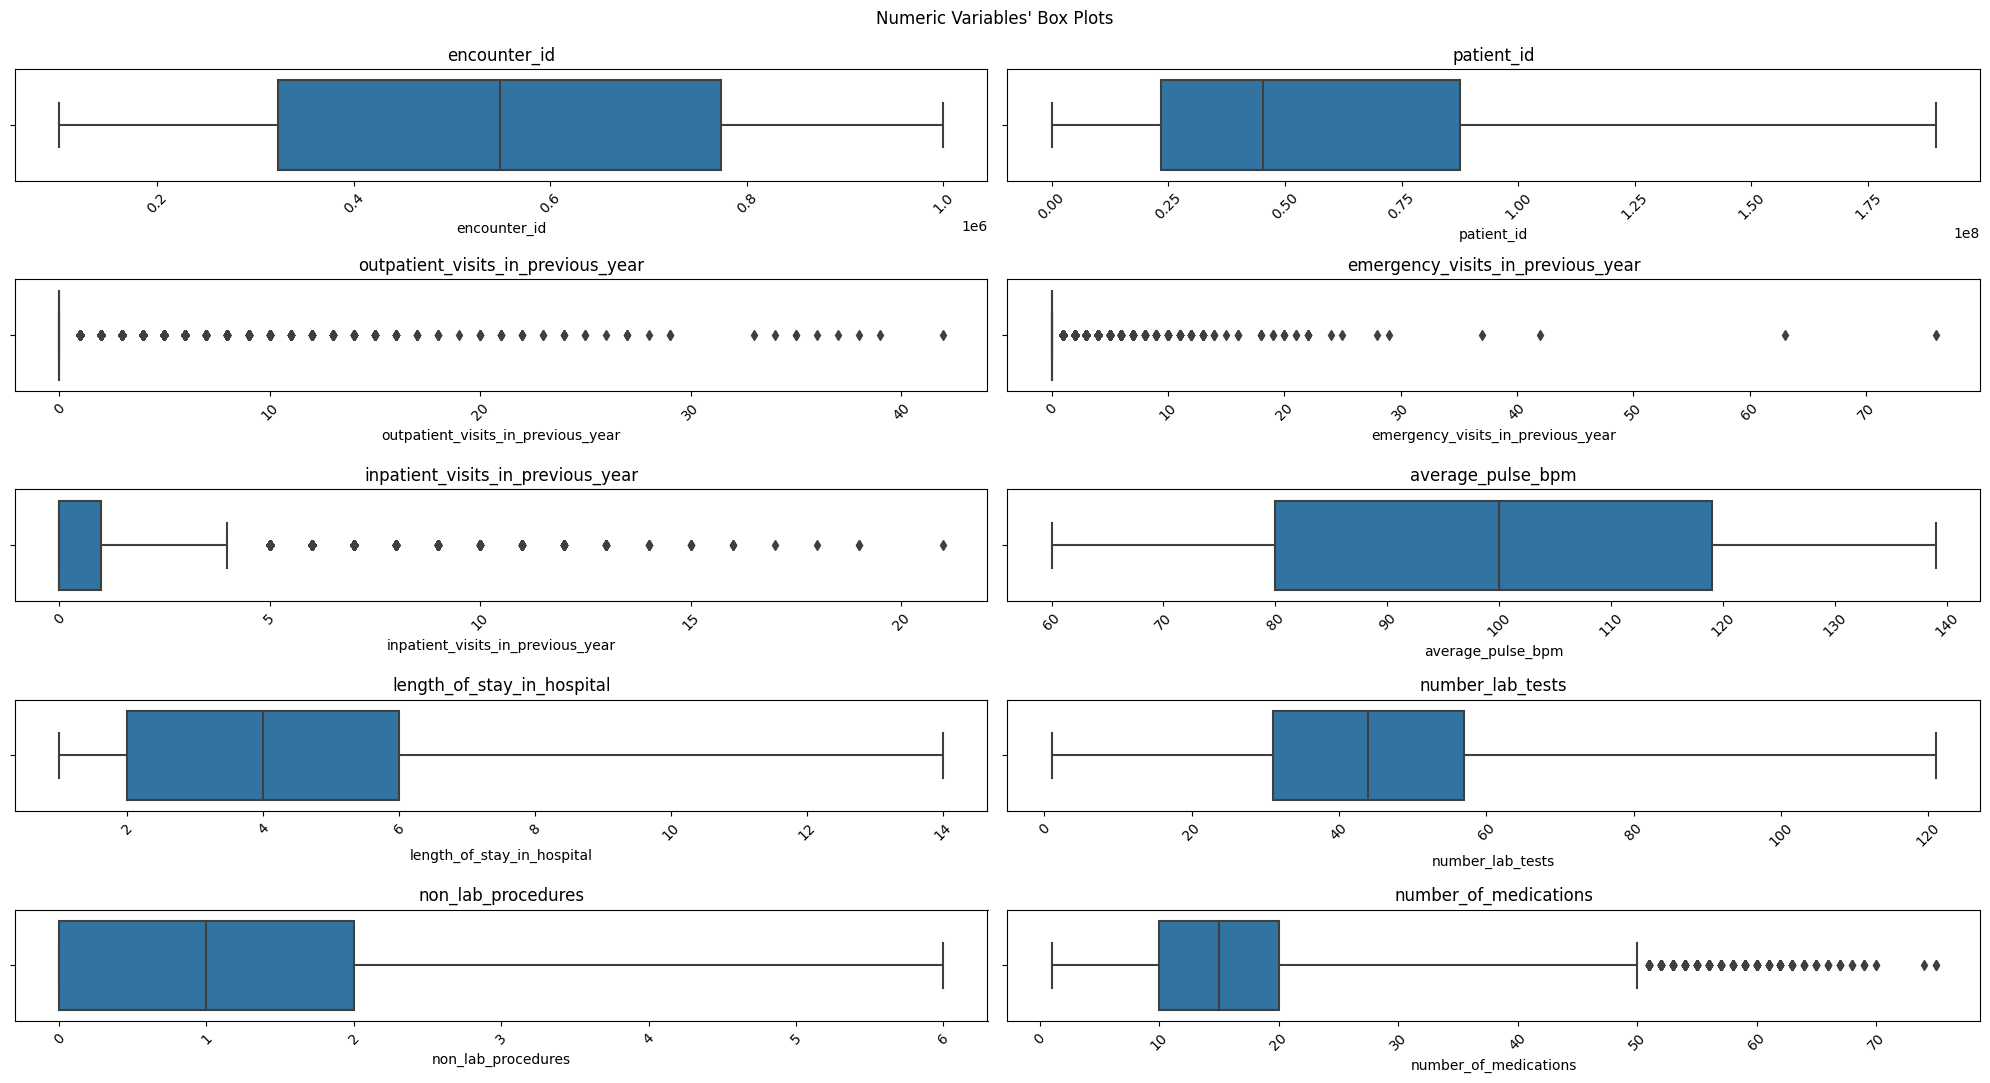

In [ ]:
# Select numeric features for box plots
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for subplots
num_rows = len(numeric_features) // 2
num_cols = 2

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot
# (using 3 interquartile ranges for higher tolerance level):
for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=train_data[feat], ax=ax, whis=3)
    ax.set_title(feat)  # Set title for each subplot
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

plt.show()

<ipython-input-10-caf0386e365a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


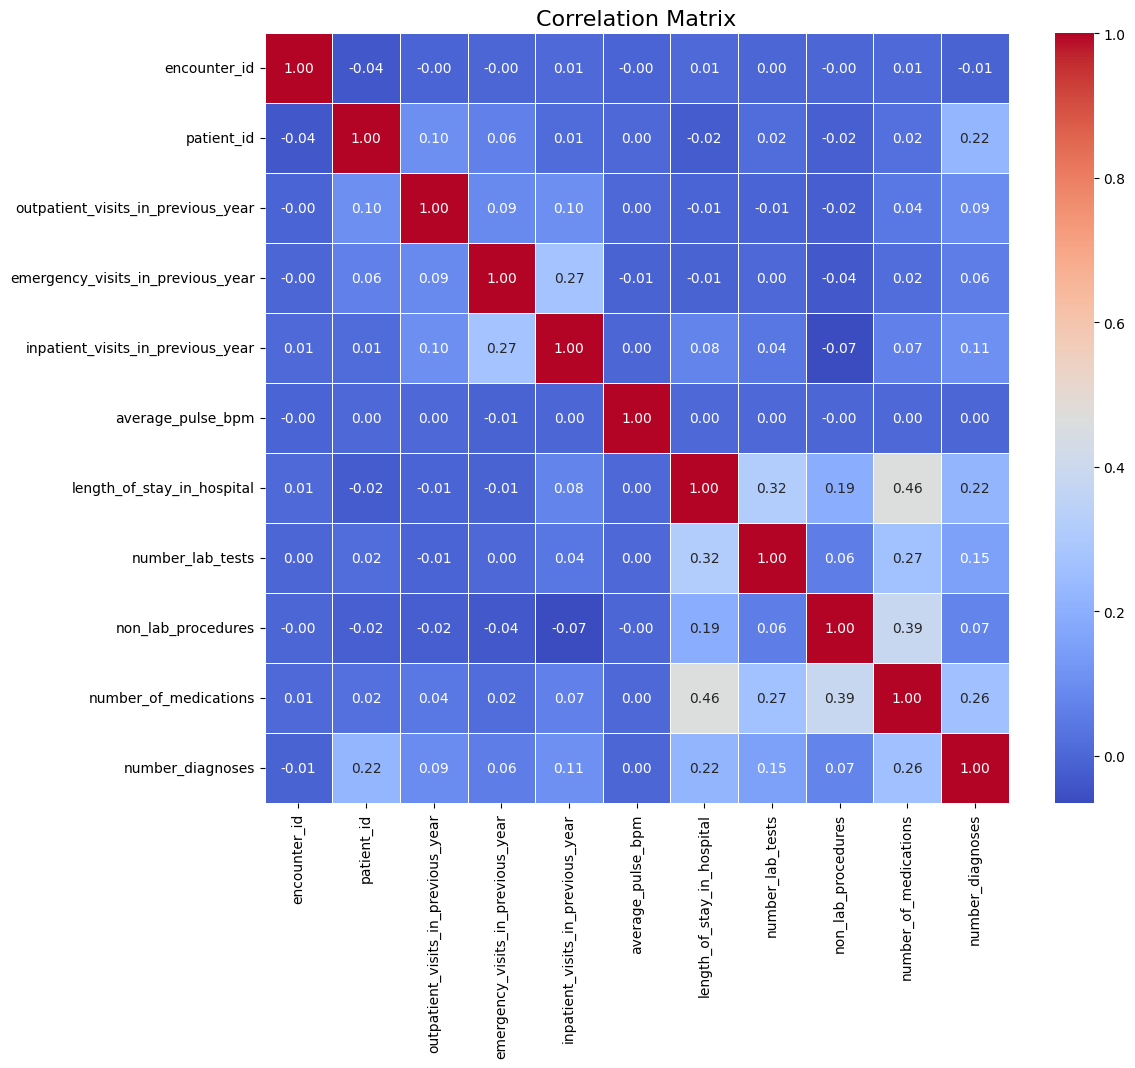

In [ ]:
correlation_matrix = train_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Correlation Matrix", fontsize=16)
plt.show()

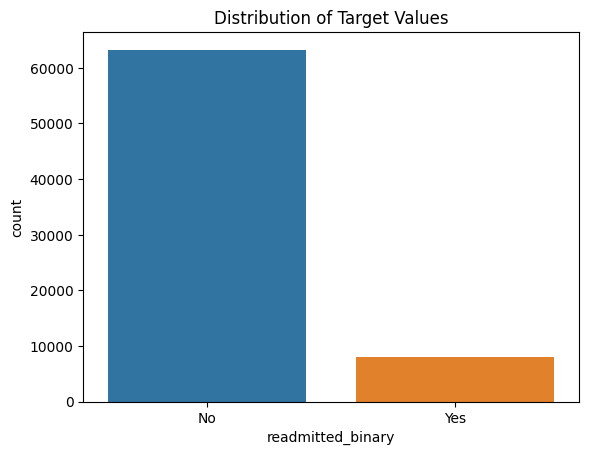

In [ ]:
sns.countplot(x = "readmitted_binary", data = train_data)
plt.title("Distribution of Target Values")
plt.show()

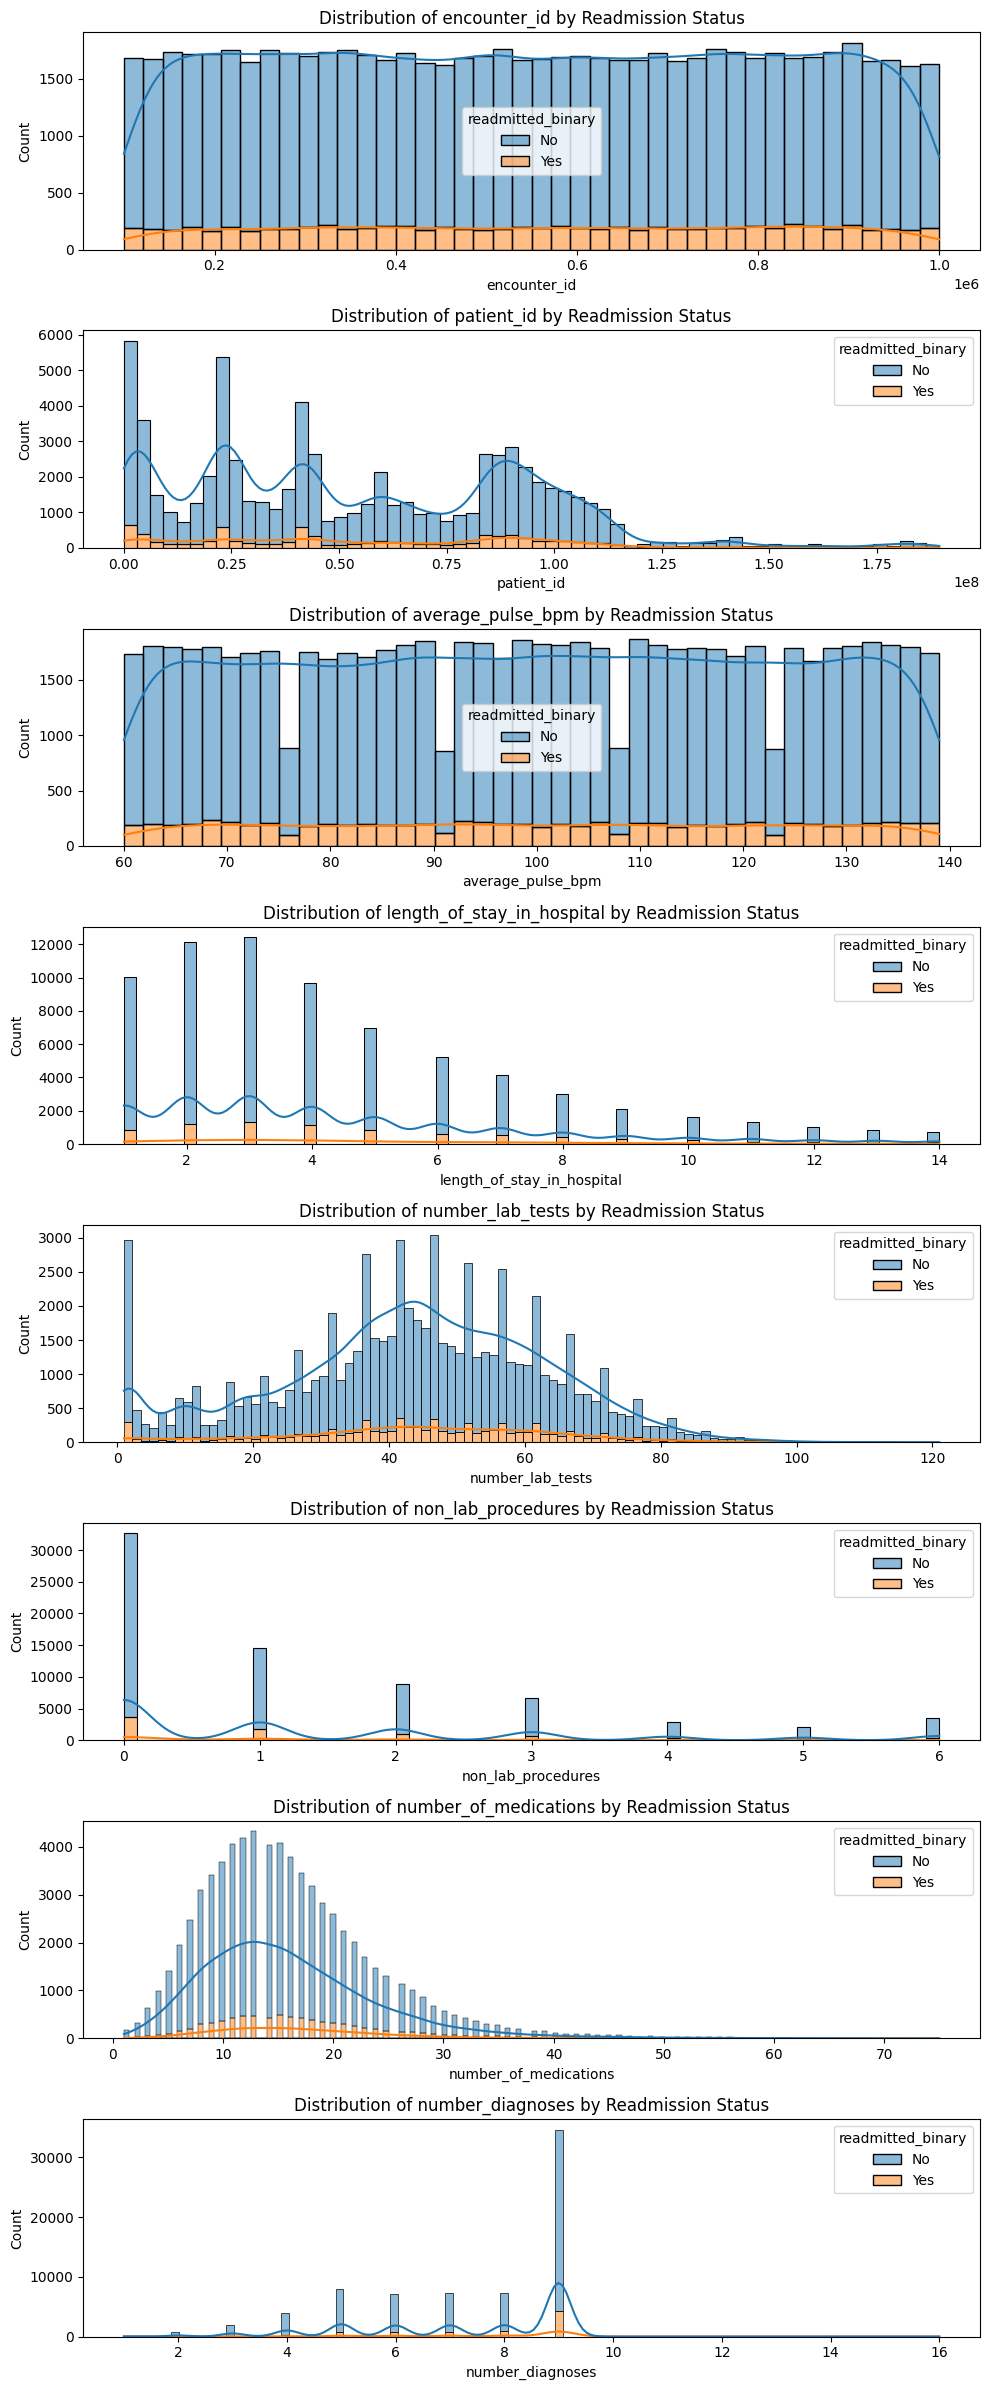

In [ ]:
#Comparing the numeric features with the target variable
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns

# Exclude specific columns that we dropped in data exploration
exclude_columns = ['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year']
numeric_features = [col for col in numeric_features if col not in exclude_columns]

# Set up subplots for better visualization
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(10, 3 * len(numeric_features)))

# Iterate through numeric features
for i, feature in enumerate(numeric_features):
    # Create a subplot for each feature
    ax = axes[i]

    # Plot histograms for 'Not Readmitted' and 'Readmitted' categories
    sns.histplot(data=train_data, x=feature, hue='readmitted_binary', multiple='stack', ax=ax, kde=True)

    # Set subplot title
    ax.set_title(f'Distribution of {feature} by Readmission Status')

# Adjust layout
plt.tight_layout()
plt.show()


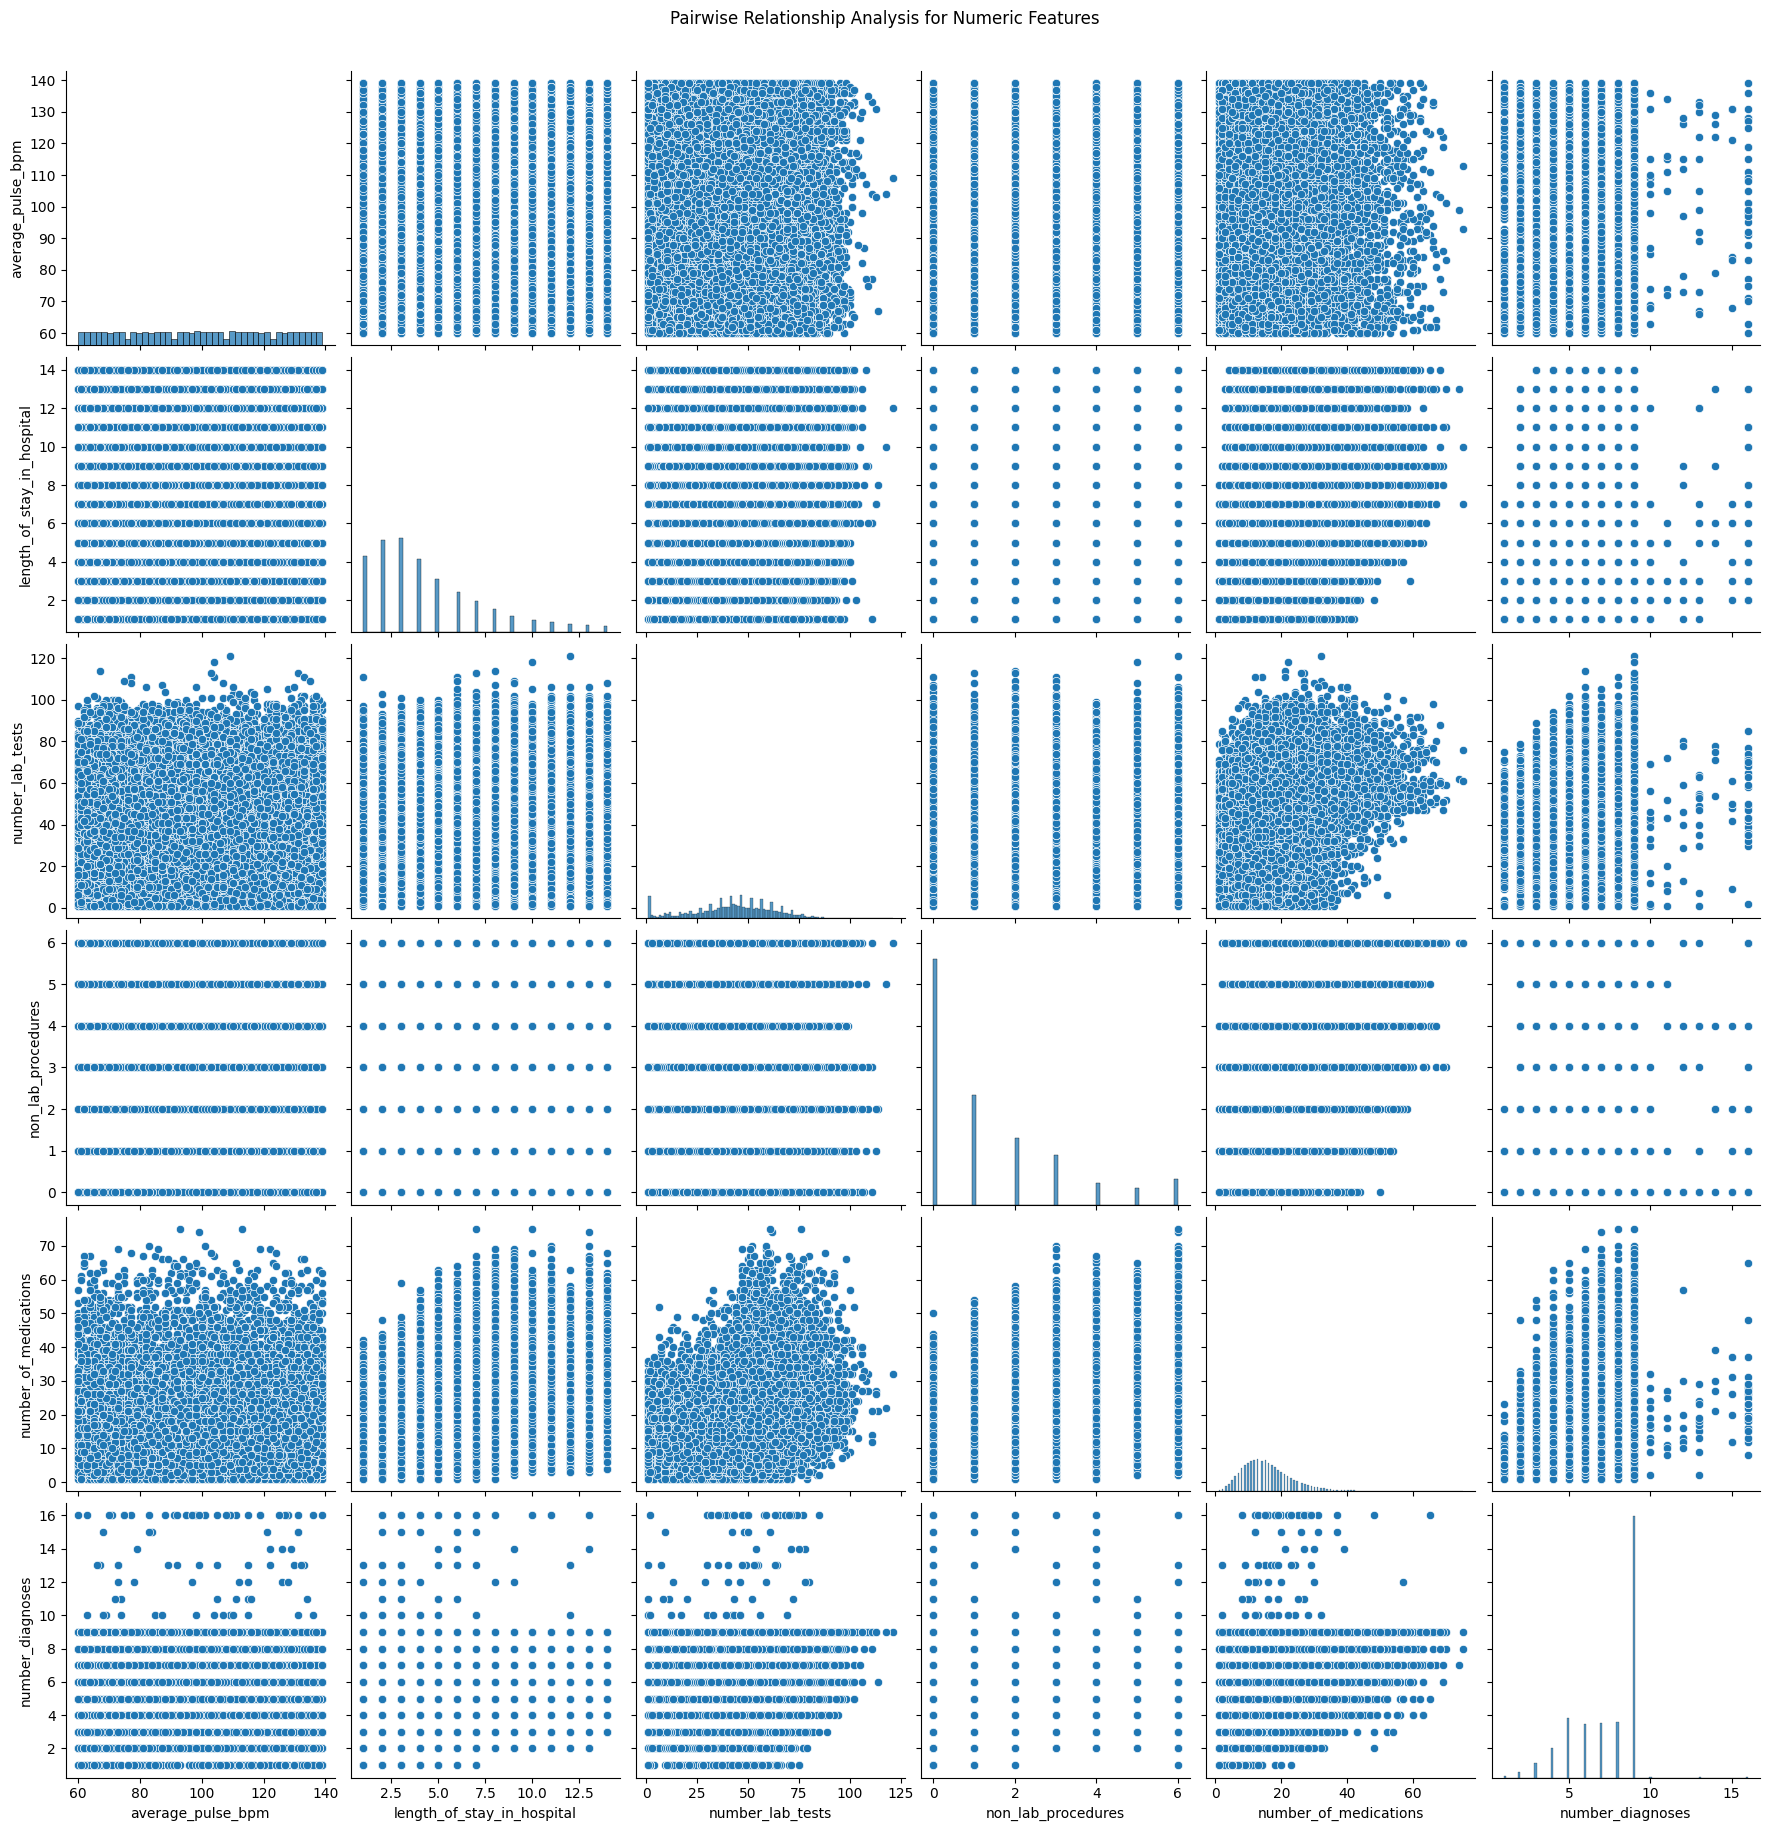

In [ ]:
# List of numeric features excluding the ones to be removed
numeric_features_to_include = [col for col in numeric_features if col not in ['patient_id', 'encounter_id', 'gender']]

# Pairwise relationship analysis of numeric features
sns.pairplot(train_data[numeric_features_to_include], height=3)
plt.suptitle('Pairwise Relationship Analysis for Numeric Features', y=1.02)
plt.show()


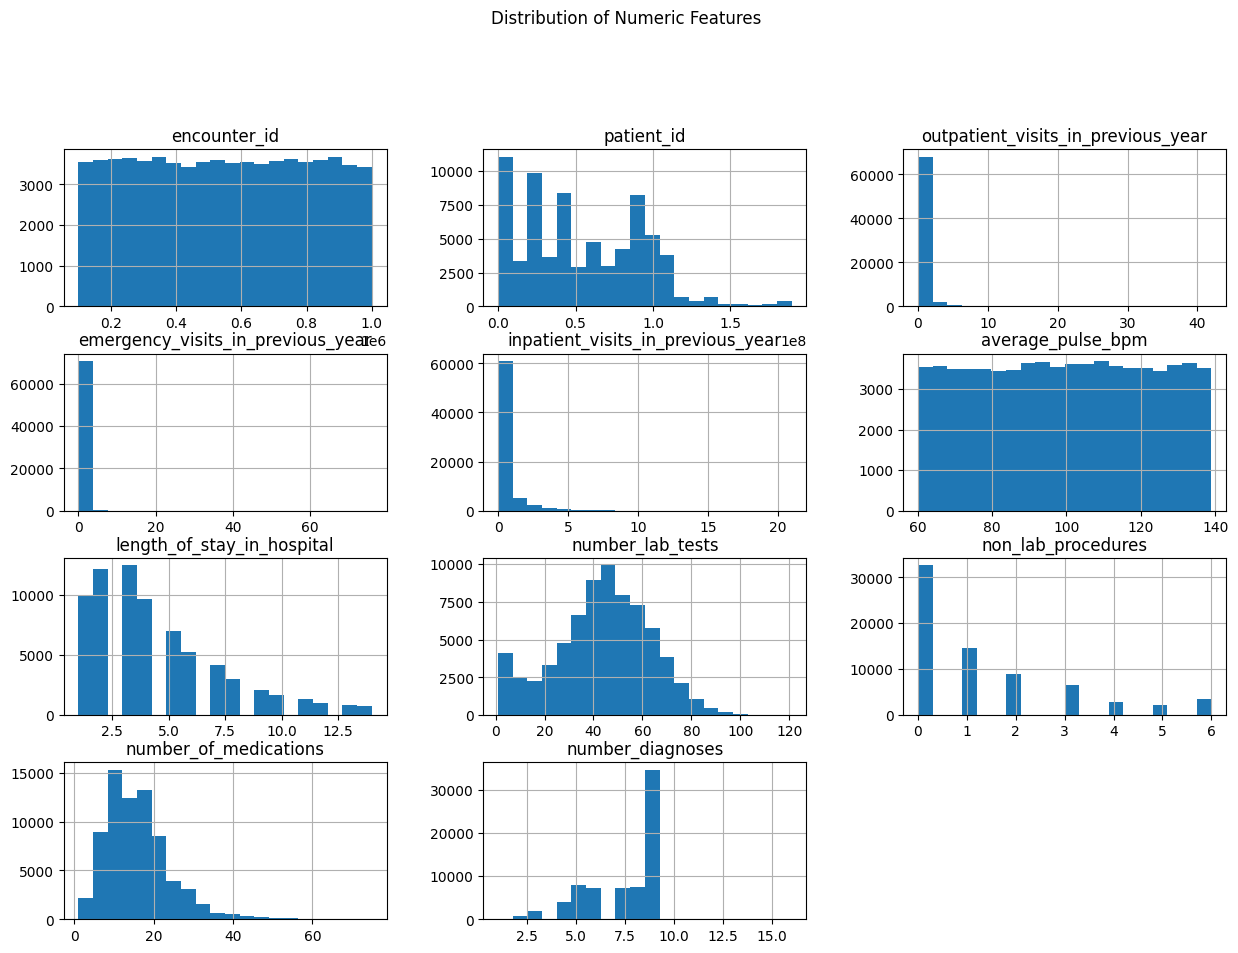

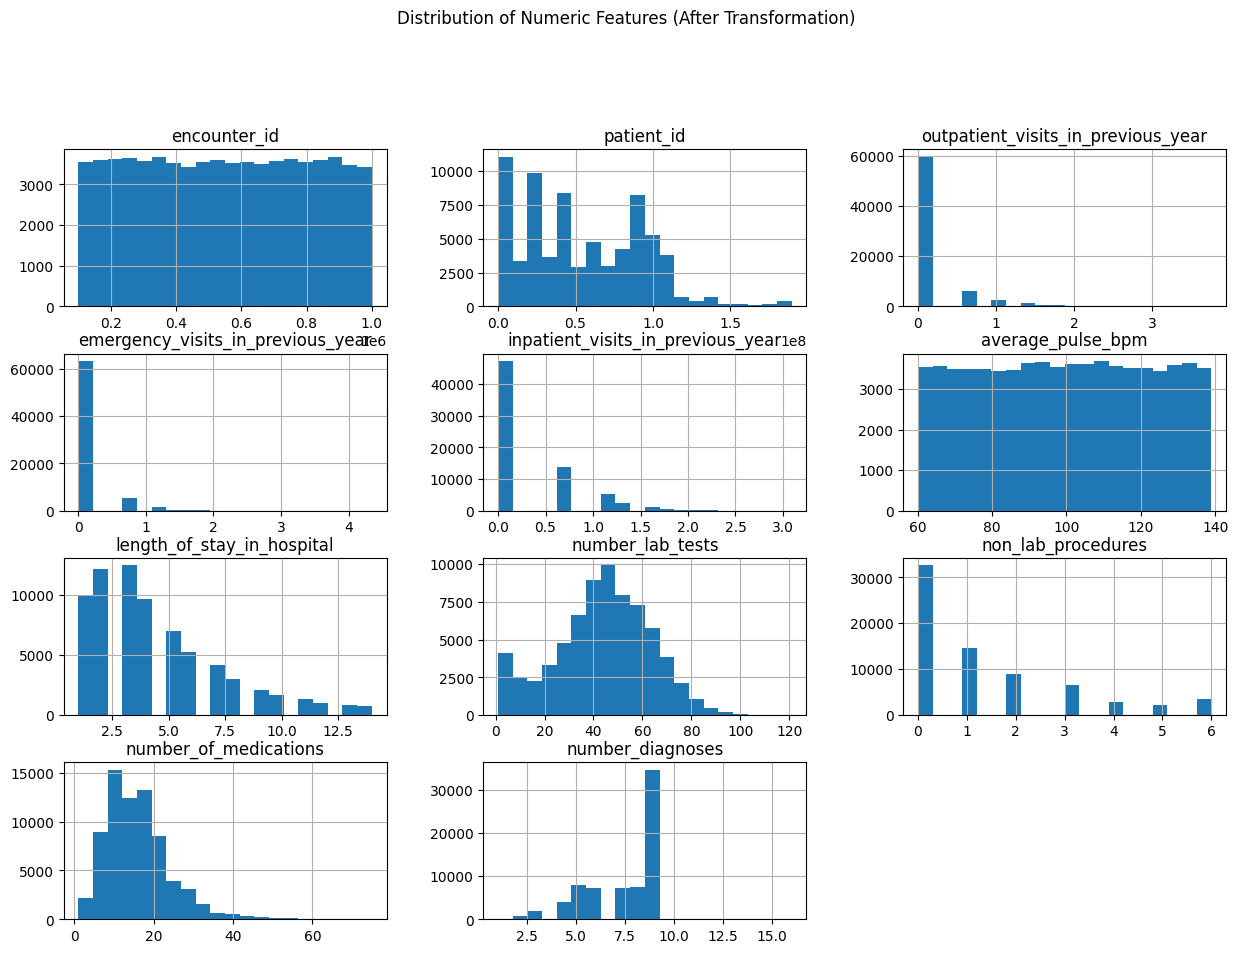

In [ ]:
# Explore distribution of numerical features
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numeric_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numeric Features', y=1.02)

# Apply logarithmic transformation to skewed features
skewed_features = ['emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'outpatient_visits_in_previous_year']

for feature in skewed_features:
    train_data[feature] = np.log1p(train_data[feature])

# Plot the histograms after transformation
train_data[numeric_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numeric Features (After Transformation)', y=1.02)
plt.show()

# Features with higher standard deviations, such as "average_pulse_bpm" and "number_lab_tests,"
# have a greater impact on the target variable and could be more informative for predictive modeling.

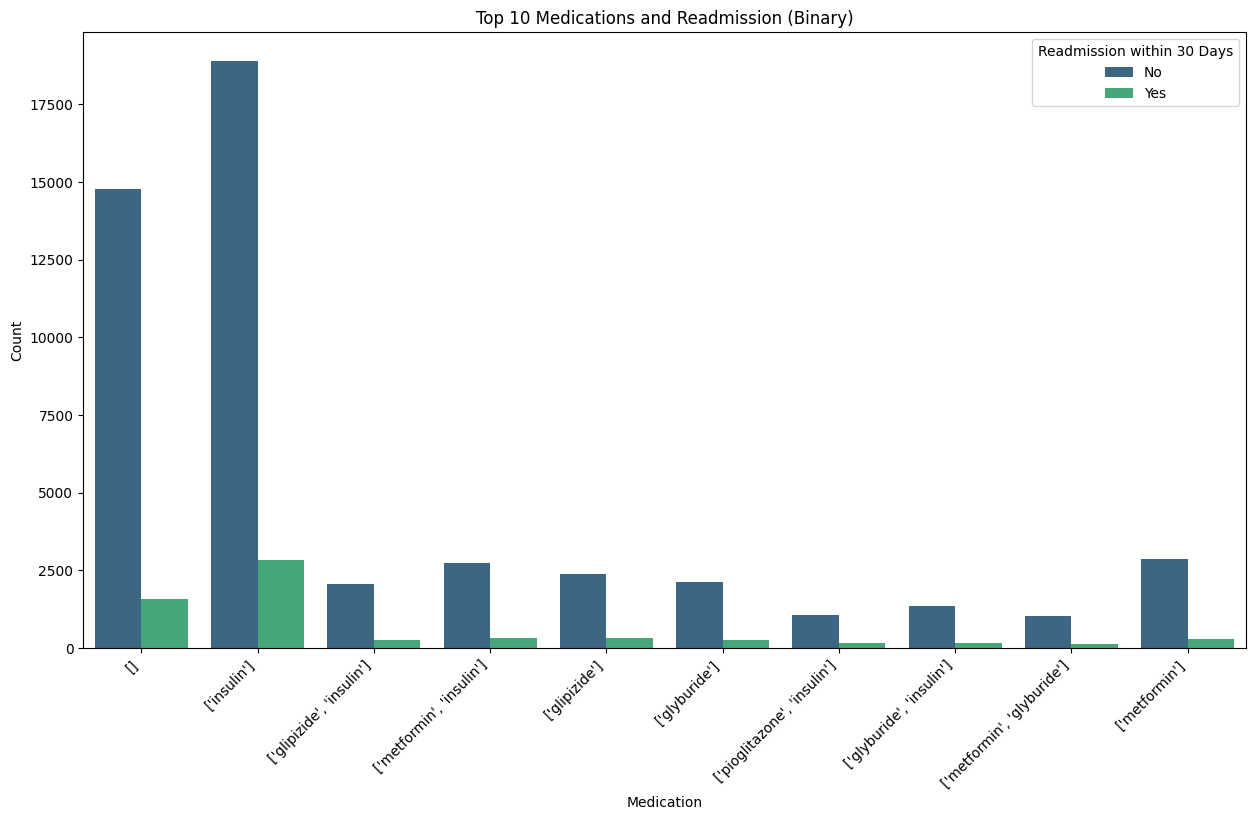

In [ ]:
# Explore the distribution of medications and their impact on readmission
plt.figure(figsize=(15, 8))
medication_counts = train_data['medication'].value_counts().nlargest(10)  # Select top 10 medications for clarity
sns.countplot(x='medication', hue='readmitted_binary', data=train_data[train_data['medication'].isin(medication_counts.index)], palette='viridis')
plt.title('Top 10 Medications and Readmission (Binary)')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Readmission within 30 Days')
plt.show()


In [ ]:
# Bar plot for Race Distribution
fig = px.bar(train_data['race'].value_counts(), x=train_data['race'].value_counts().index,
             y=train_data['race'].value_counts(),
             labels={'x': 'Race', 'y': 'Count'}, title='Distribution of Patients by Race',
             color_discrete_sequence=px.colors.qualitative.Set1)  # Use color_discrete_sequence for categorical variables
fig.update_layout(template="plotly_dark")
fig.show()

# Bar plot for Gender Distribution
fig = px.bar(train_data['gender'].value_counts(), x=train_data['gender'].value_counts().index,
             y=train_data['gender'].value_counts(),
             labels={'x': 'Gender', 'y': 'Count'}, title='Distribution of Patients by Gender',
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Use color_discrete_sequence for categorical variables
fig.update_layout(template="plotly_dark")
fig.show()

# Bar plot for Admission Type Distribution
fig = px.bar(train_data['admission_type'].value_counts(), x=train_data['admission_type'].value_counts().index,
             y=train_data['admission_type'].value_counts(),
             labels={'x': 'Admission Type', 'y': 'Count'}, title='Distribution of Admission Types',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Use color_discrete_sequence for categorical variables
fig.update_layout(template="plotly_dark")
fig.show()

# Bar plot for Diabetes Medication Prescription Distribution
fig = px.bar(train_data['prescribed_diabetes_meds'].value_counts(),
             x=train_data['prescribed_diabetes_meds'].value_counts().index,
             y=train_data['prescribed_diabetes_meds'].value_counts(),
             labels={'x': 'Prescribed Diabetes Medications', 'y': 'Count'},
             title='Distribution of Diabetes Medication Prescription',
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Use color_discrete_sequence for categorical variables
fig.update_layout(template="plotly_dark")
fig.show()

# Distribution of the number of diagnoses
fig = px.histogram(train_data, x='number_diagnoses', nbins=15, color_discrete_sequence=['skyblue'],
                   labels={'x': 'Number of Diagnoses', 'y': 'Count'},
                   title='Distribution of Number of Diagnoses')
fig.update_layout(template="plotly_dark")
fig.show()

# Pre Processing

### Target Variable binary

In [ ]:
# Transforming Target Variable into numeric
train_data['readmitted_binary_numeric'] = (train_data['readmitted_binary'] == 'Yes').astype(int)

# Verify the changes
print(train_data['readmitted_binary_numeric'].unique())


[0 1]


### Target Variable Multiclass

In [ ]:
train_data['readmitted_multiclass'].unique()

array(['>30 days', 'No', '<30 days'], dtype=object)

In [ ]:
# Label Encoding
label_mapping = {'No': 0, '<30 days': 1, '>30 days': 2}
train_data['readmitted_multiclass_encoded'] = train_data['readmitted_multiclass'].map(label_mapping)

# Display the preprocessed train data
print(train_data[['readmitted_multiclass', 'readmitted_multiclass_encoded']])

      readmitted_multiclass  readmitted_multiclass_encoded
0                  >30 days                              2
1                        No                              0
2                        No                              0
3                        No                              0
4                  >30 days                              2
...                     ...                            ...
71231                    No                              0
71232                    No                              0
71233              <30 days                              1
71234                    No                              0
71235              >30 days                              2

[71236 rows x 2 columns]


### Race

In [ ]:
# Given that the most common races are "Caucasian" (50.693K) and "African American" (12.693K), and the remaining ones represent only approximately 6.34%, we have decided to group the less frequent races into a single category called "Others"

# Replace '?', 'Hispanic', 'Other', and 'Asian' with 'Others'
train_data['race'] = train_data['race'].replace(['?', 'Hispanic', 'Other', 'Asian'], 'Others')

# Filter to keep only 'Caucasian', 'AfricanAmerican', and 'Others'
train_data['race'] = train_data['race'].apply(lambda x: x if x in ['Caucasian', 'AfricanAmerican', 'Others'] else 'Others')

# Create binary columns using get_dummies
race_dummies = pd.get_dummies(train_data['race'], prefix='race')

# Concatenate the binary columns with the original DataFrame
train_data = pd.concat([train_data, race_dummies], axis=1)

# Check the updated DataFrame
print(train_data[['race', 'race_Caucasian', 'race_AfricanAmerican', 'race_Others']])

                  race  race_Caucasian  race_AfricanAmerican  race_Others
0            Caucasian               1                     0            0
1      AfricanAmerican               0                     1            0
2            Caucasian               1                     0            0
3      AfricanAmerican               0                     1            0
4            Caucasian               1                     0            0
...                ...             ...                   ...          ...
71231  AfricanAmerican               0                     1            0
71232  AfricanAmerican               0                     1            0
71233        Caucasian               1                     0            0
71234        Caucasian               1                     0            0
71235        Caucasian               1                     0            0

[71236 rows x 4 columns]


In [ ]:
#We perform the same
# Replace '?', 'Hispanic', 'Other', and 'Asian' with 'Others'
test_data['race'] = test_data['race'].replace(['?', 'Hispanic', 'Other', 'Asian'], 'Others')

# Filter to keep only 'Caucasian', 'AfricanAmerican', and 'Others'
test_data['race'] = test_data['race'].apply(lambda x: x if x in ['Caucasian', 'AfricanAmerican', 'Others'] else 'Others')

# Create binary columns using get_dummies
race_dummies_test = pd.get_dummies(test_data['race'], prefix='race')

# Concatenate the binary columns with the original DataFrame
test_data = pd.concat([test_data, race_dummies_test], axis=1)

# Check the updated DataFrame
print(test_data[['race', 'race_Caucasian', 'race_AfricanAmerican', 'race_Others']])


                  race  race_Caucasian  race_AfricanAmerican  race_Others
0            Caucasian               1                     0            0
1            Caucasian               1                     0            0
2      AfricanAmerican               0                     1            0
3            Caucasian               1                     0            0
4            Caucasian               1                     0            0
...                ...             ...                   ...          ...
30525        Caucasian               1                     0            0
30526        Caucasian               1                     0            0
30527        Caucasian               1                     0            0
30528        Caucasian               1                     0            0
30529        Caucasian               1                     0            0

[30530 rows x 4 columns]


### Gender

In [ ]:
# Considering that there are only 3 values of Unknown/Invalid in the Gender column, we have opted to drop these rows and transform the Gender column into binary (0-male, 1-female).

# Drop rows with 'Unknown/Invalid' in the 'gender' column
train_data = train_data[train_data['gender'] != 'Unknown/Invalid']

# Encode 'Male' as 0 and 'Female' as 1
train_data['gender'] = train_data['gender'].map({'Male': 0, 'Female': 1})

# Check the updated distribution of 'gender'
print(train_data['gender'].value_counts())

1    38228
0    33005
Name: gender, dtype: int64


In [ ]:
# Drop rows with 'Unknown/Invalid' in the 'gender' column in the test data
test_data = test_data[test_data['gender'] != 'Unknown/Invalid']

# Encode 'Male' as 0 and 'Female' as 1 in the test data
test_data['gender'] = test_data['gender'].map({'Male': 0, 'Female': 1})

### Age

In [ ]:
# Frequência de cada classe na coluna 'age'
age_frequencies = train_data['age'].value_counts().sort_index()
# Contar o número de valores nulos na coluna "age"
num_null_values_age = train_data['age'].isnull().sum()

print(f'O número de valores nulos na coluna "age" é: {num_null_values_age}')


medium_values = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
weighted_sum = 0
total_by_age =[]
for value in age_frequencies:
    weighted_sum += value
    total_by_age.append(value)

age_sum = sum(value * medium_value for value, medium_value in zip(total_by_age, medium_values))
medium_age = age_sum/weighted_sum
print(medium_age)

O número de valores nulos na coluna "age" é: 3557
66.01232342337018


In [ ]:
# Contar o número de valores nulos na coluna "age"
num_null_values_age = train_data['age'].isnull().sum()
print(f'O número de valores nulos na coluna "age" é: {num_null_values_age}')
# Substituir valores nulos na coluna "age" pela classe de 50 a 60, pois é medium value
train_data['age'].fillna('[50-60)', inplace=True)

# Verificar se ainda existem valores nulos na coluna "age"
num_null_values_age = train_data['age'].isnull().sum()

print(f'O número de valores nulos na coluna "age" agora é: {num_null_values_age}')




O número de valores nulos na coluna "age" é: 3557
O número de valores nulos na coluna "age" agora é: 0


In [ ]:
# Count the number of null values in the 'age' column in the test data
num_null_values_age_test = test_data['age'].isnull().sum()
print(f'The number of null values in the "age" column is: {num_null_values_age_test}')

# Replace null values in the 'age' column with the category '[50-60)' in the test data
test_data['age'].fillna('[50-60)', inplace=True)

# Check if there are still null values in the 'age' column in the test data
num_null_values_age_test = test_data['age'].isnull().sum()
print(f'The number of null values in the "age" column is now: {num_null_values_age_test}')

The number of null values in the "age" column is: 1531
The number of null values in the "age" column is now: 0


In [ ]:
train_data = pd.get_dummies(train_data, columns=['age'], drop_first=True)
# Apply one-hot encoding to the 'age' column in the test data as well
test_data = pd.get_dummies(test_data, columns=['age'], drop_first=True)

### Weight

In [ ]:
# Considering that the Weight column has 90% missing values, we have decided to drop it.

# Drop the 'weight' column
train_data = train_data.drop(columns=['weight'])
test_data = test_data.drop(columns=['weight'])
# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender payer_code  \
0        533253     USA       70110        Caucasian       1          ?   
1        426224     USA    29775006  AfricanAmerican       0          ?   
2        634063     USA    80729253        Caucasian       1          ?   
3        890610     USA     2919042  AfricanAmerican       0         MC   
4        654194     USA    84871971        Caucasian       1         HM   

   outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                            0.000000                                0.0   
1                            0.000000                                0.0   
2                            0.000000                                0.0   
3                            0.000000                                0.0   
4                            0.693147                                0.0   

   inpatient_visits_in_previous_year admission_type  ... race_Others  \
0                   

### Payer_code

In [ ]:
# Considering that the Payer_code column has 40% missing values and no apparent correlation to the target, we have decided to drop it.

# Drop the 'payer_code' column
train_data = train_data.drop(columns=['payer_code'])
test_data = test_data.drop(columns=['payer_code'])

# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender  \
0        533253     USA       70110        Caucasian       1   
1        426224     USA    29775006  AfricanAmerican       0   
2        634063     USA    80729253        Caucasian       1   
3        890610     USA     2919042  AfricanAmerican       0   
4        654194     USA    84871971        Caucasian       1   

   outpatient_visits_in_previous_year  emergency_visits_in_previous_year  \
0                            0.000000                                0.0   
1                            0.000000                                0.0   
2                            0.000000                                0.0   
3                            0.000000                                0.0   
4                            0.693147                                0.0   

   inpatient_visits_in_previous_year admission_type       medical_specialty  \
0                           1.098612      Emergency  Family/GeneralPractice   


### outpatient_visits_in_previous_year

In [ ]:
# Considering that the outpatient_visits_in_previous_year column has very imbalanced towards zero, we have decided to drop it.

# Drop the 'outpatient_visits_in_previous_year' column
train_data = train_data.drop(columns=['outpatient_visits_in_previous_year'])
test_data = test_data.drop(columns=['outpatient_visits_in_previous_year'])
# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender  \
0        533253     USA       70110        Caucasian       1   
1        426224     USA    29775006  AfricanAmerican       0   
2        634063     USA    80729253        Caucasian       1   
3        890610     USA     2919042  AfricanAmerican       0   
4        654194     USA    84871971        Caucasian       1   

   emergency_visits_in_previous_year  inpatient_visits_in_previous_year  \
0                                0.0                           1.098612   
1                                0.0                           0.000000   
2                                0.0                           0.693147   
3                                0.0                           0.693147   
4                                0.0                           0.000000   

  admission_type       medical_specialty  average_pulse_bpm  ... race_Others  \
0      Emergency  Family/GeneralPractice                127  ...           0   
1   

### emergency_visits_in_previous_year

In [ ]:
# Considering that the emergency_visits_in_previous_year column has very imbalanced towards zero, we have decided to drop it.

# Drop the 'emergency_visits_in_previous_year' column
train_data = train_data.drop(columns=['emergency_visits_in_previous_year'])
test_data = test_data.drop(columns=['emergency_visits_in_previous_year'])

# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender  \
0        533253     USA       70110        Caucasian       1   
1        426224     USA    29775006  AfricanAmerican       0   
2        634063     USA    80729253        Caucasian       1   
3        890610     USA     2919042  AfricanAmerican       0   
4        654194     USA    84871971        Caucasian       1   

   inpatient_visits_in_previous_year admission_type       medical_specialty  \
0                           1.098612      Emergency  Family/GeneralPractice   
1                           0.000000      Emergency                       ?   
2                           0.693147            NaN  Family/GeneralPractice   
3                           0.693147      Emergency        InternalMedicine   
4                           0.000000       Elective                       ?   

   average_pulse_bpm                              discharge_disposition  ...  \
0                127                                 Dischar

### inpatient_visits_in_previous_year

In [ ]:
# Considering that the inpatient_visits_in_previous_year column has very imbalanced towards zero, we have decided to drop it.

# Drop the 'inpatient_visits_in_previous_year' column
train_data = train_data.drop(columns=['inpatient_visits_in_previous_year'])
test_data = test_data.drop(columns=['inpatient_visits_in_previous_year'])
# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender admission_type  \
0        533253     USA       70110        Caucasian       1      Emergency   
1        426224     USA    29775006  AfricanAmerican       0      Emergency   
2        634063     USA    80729253        Caucasian       1            NaN   
3        890610     USA     2919042  AfricanAmerican       0      Emergency   
4        654194     USA    84871971        Caucasian       1       Elective   

        medical_specialty  average_pulse_bpm  \
0  Family/GeneralPractice                127   
1                       ?                128   
2  Family/GeneralPractice                 94   
3        InternalMedicine                 81   
4                       ?                126   

                               discharge_disposition  \
0                                 Discharged to home   
1  Discharged/transferred to a federal health car...   
2                                 Discharged to home   
3           

### admission_type

Emergency        37740
Elective         13210
Urgent           13024
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: admission_type, dtype: int64


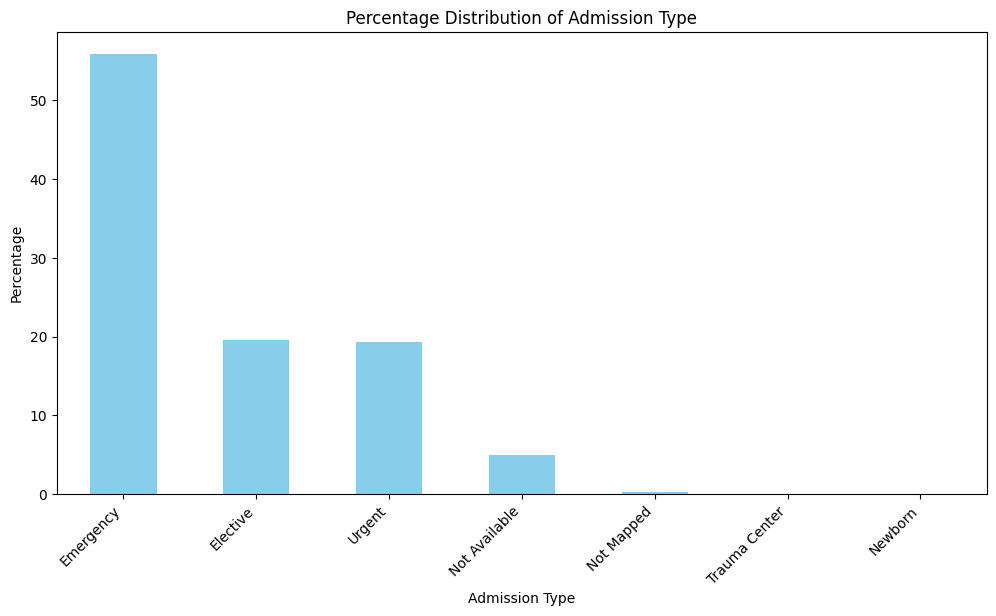

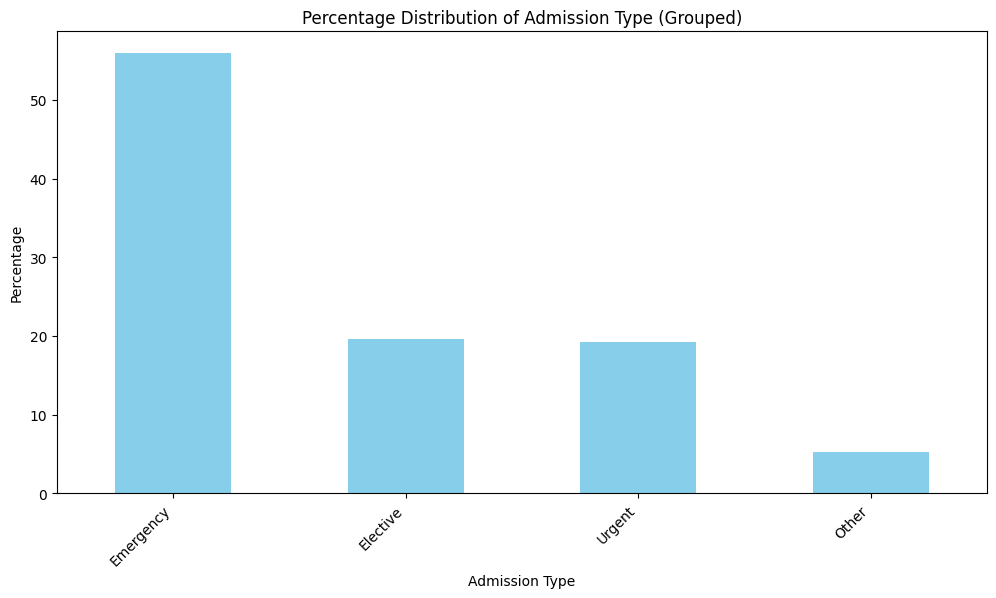

In [ ]:
# Display the unique values and their distribution
print(train_data['admission_type'].value_counts())

# Plot the percentage distribution of 'admission_type'
total_entries = len(train_data)
percentage_distribution = train_data['admission_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
percentage_distribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Identify categories with less than 5% distribution
below_threshold = percentage_distribution[percentage_distribution < 5]

# Group those categories into "Other"
train_data['admission_type_grouped'] = train_data['admission_type'].apply(lambda x: 'Other' if x in below_threshold.index else x)

# Plot the histogram with grouped categories
grouped_percentage_distribution = train_data['admission_type_grouped'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
grouped_percentage_distribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Admission Type (Grouped)')
plt.xlabel('Admission Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# One-hot encode the 'admission_type_grouped' column
admission_type_encoded = pd.get_dummies(train_data['admission_type_grouped'], prefix='admission_type')

# Merge the encoded columns with the original train_data
train_data = pd.concat([train_data, admission_type_encoded], axis=1)


In [ ]:
# Group those categories into "Other" in the test data
test_data['admission_type_grouped'] = test_data['admission_type'].apply(lambda x: 'Other' if x in below_threshold.index else x)

# One-hot encode the 'admission_type_grouped' column in the test data
admission_type_encoded_test = pd.get_dummies(test_data['admission_type_grouped'], prefix='admission_type')

# Merge the encoded columns with the original test_data
test_data = pd.concat([test_data, admission_type_encoded_test], axis=1)

### medical_speciality

In [ ]:
# The medical_specialty column is being dropped due to its unbalanced and skewed distribution

# Drop the 'medical_specialty' column
train_data = train_data.drop(columns=['medical_specialty'])
test_data = test_data.drop(columns=['medical_specialty'])
# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender admission_type  \
0        533253     USA       70110        Caucasian       1      Emergency   
1        426224     USA    29775006  AfricanAmerican       0      Emergency   
2        634063     USA    80729253        Caucasian       1            NaN   
3        890610     USA     2919042  AfricanAmerican       0      Emergency   
4        654194     USA    84871971        Caucasian       1       Elective   

   average_pulse_bpm                              discharge_disposition  \
0                127                                 Discharged to home   
1                128  Discharged/transferred to a federal health car...   
2                 94                                 Discharged to home   
3                 81                                 Discharged to home   
4                126  Discharged/transferred to home with home healt...   

                              admission_source  length_of_stay_in_hospital

### average_pulse_bpm

In [ ]:
# ADD COMMENT

# Extract the 'average_pulse_bpm' column
pulse_bpm_values = train_data['average_pulse_bpm'].values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_pulse_bpm = scaler.fit_transform(pulse_bpm_values)

# Replace the original column with the scaled values
train_data['average_pulse_bpm'] = scaled_pulse_bpm

# Check the updated distribution of 'average_pulse_bpm'
print(train_data['average_pulse_bpm'].value_counts())

-1.588973    951
-0.460535    950
 0.407495    948
-0.026520    946
 1.492532    943
            ... 
-0.677542    844
-0.851148    835
-1.241761    832
-0.113323    817
 1.188721    808
Name: average_pulse_bpm, Length: 80, dtype: int64


In [ ]:
# Extract the 'average_pulse_bpm' column from test
pulse_bpm_values_test = test_data['average_pulse_bpm'].values.reshape(-1, 1)

# Use the same scaler to transform the test data
scaled_pulse_bpm_test = scaler.transform(pulse_bpm_values_test)

# Replace the original column in the test data with the scaled values
test_data['average_pulse_bpm'] = scaled_pulse_bpm_test

### discharge_disposition

Because this variable does only have two unique variables (discharged to home and others) and null values it is deduced that it won't be relevant for our model.

In [ ]:
# Drop the 'discharge_disposition' column
train_data = train_data.drop(columns=['discharge_disposition'])
test_data = test_data.drop(columns=['discharge_disposition'])

# Check the updated DataFrame
print(train_data.head())


   encounter_id country  patient_id             race  gender admission_type  \
0        533253     USA       70110        Caucasian       1      Emergency   
1        426224     USA    29775006  AfricanAmerican       0      Emergency   
2        634063     USA    80729253        Caucasian       1            NaN   
3        890610     USA     2919042  AfricanAmerican       0      Emergency   
4        654194     USA    84871971        Caucasian       1       Elective   

   average_pulse_bpm                             admission_source  \
0           1.188721                               Emergency Room   
1           1.232123                              Clinic Referral   
2          -0.243527                                          NaN   
3          -0.807746   Transfer from another health care facility   
4           1.145320                           Physician Referral   

   length_of_stay_in_hospital  number_lab_tests  ...  age_[50-60)  \
0                           2            

### admission_source

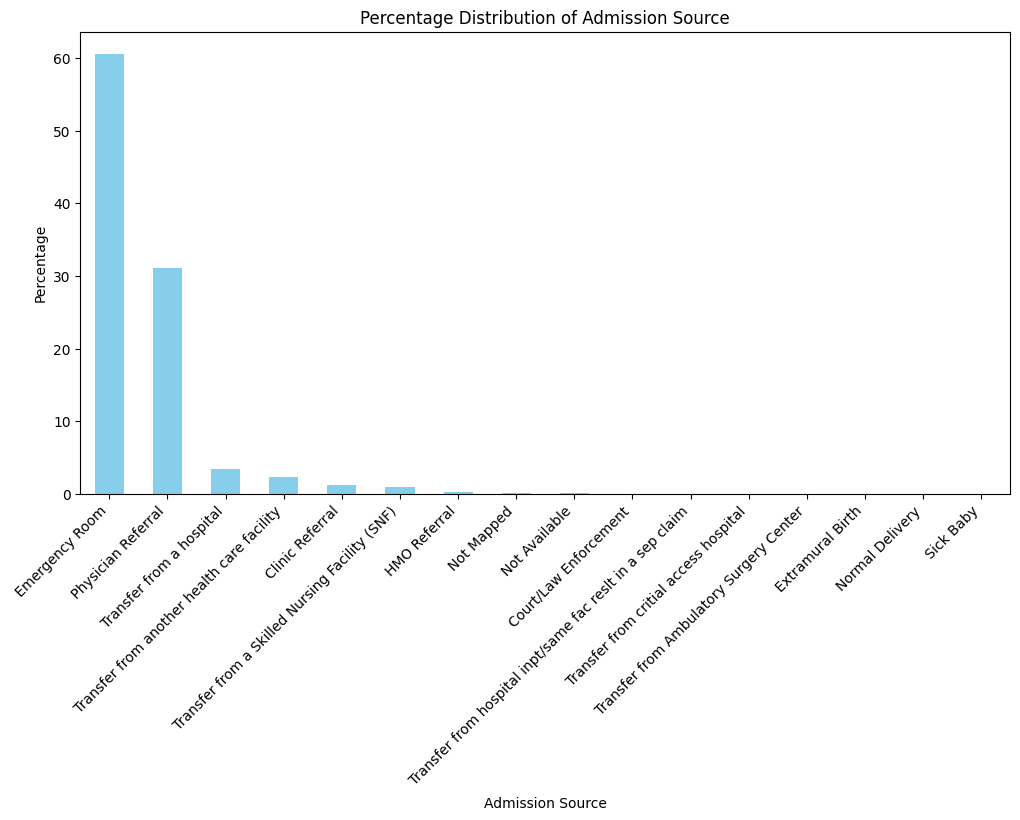

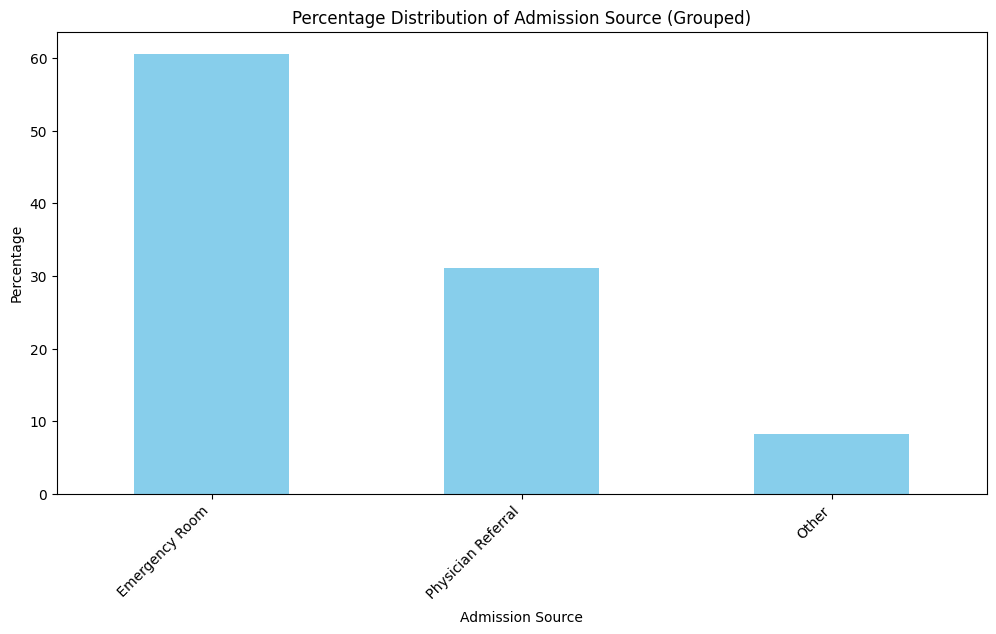

In [ ]:
train_data['admission_source'].unique()

total_entries = len(train_data)
percentage_distribution = train_data['admission_source'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
percentage_distribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Admission Source')
plt.xlabel('Admission Source')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

below_threshold = percentage_distribution[percentage_distribution < 5]

# Group those categories into "Other"
train_data['admission_source_grouped'] = train_data['admission_source'].apply(lambda x: 'Other' if x in below_threshold.index else x)

# Plot the histogram with grouped categories
grouped_percentage_distribution = train_data['admission_source_grouped'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
grouped_percentage_distribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Admission Source (Grouped)')
plt.xlabel('Admission Source')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

admission_source_encoded = pd.get_dummies(train_data['admission_source_grouped'], prefix='admission_source')

# Merge the encoded columns with the original train_data
train_data = pd.concat([train_data, admission_source_encoded], axis=1)

In [ ]:
# Group categories in 'admission_source' based on the threshold defined in the training data
below_threshold_test = percentage_distribution[percentage_distribution < 5]
test_data['admission_source_grouped'] = test_data['admission_source'].apply(lambda x: 'Other' if x in below_threshold_test.index else x)

# Encode the grouped categories in the test data using the same encoding used in training
admission_source_encoded_test = pd.get_dummies(test_data['admission_source_grouped'], prefix='admission_source')

# Merge the encoded columns with the original test_data
test_data = pd.concat([test_data, admission_source_encoded_test], axis=1)

In [ ]:
print(train_data)

       encounter_id country  patient_id             race  gender  \
0            533253     USA       70110        Caucasian       1   
1            426224     USA    29775006  AfricanAmerican       0   
2            634063     USA    80729253        Caucasian       1   
3            890610     USA     2919042  AfricanAmerican       0   
4            654194     USA    84871971        Caucasian       1   
...             ...     ...         ...              ...     ...   
71231        660160     USA    24531381  AfricanAmerican       1   
71232        826429     USA     4663818  AfricanAmerican       1   
71233        332030     USA    23397147        Caucasian       1   
71234        757560     USA    52161750        Caucasian       0   
71235        459757     USA    88410897        Caucasian       0   

      admission_type  average_pulse_bpm  \
0          Emergency           1.188721   
1          Emergency           1.232123   
2                NaN          -0.243527   
3          

### length_of_stay_in_hospital

In [ ]:
train_data['length_of_stay_in_hospital'].unique()

array([ 2, 14,  6,  3,  1,  8,  4,  5,  7, 12,  9, 13, 10, 11])

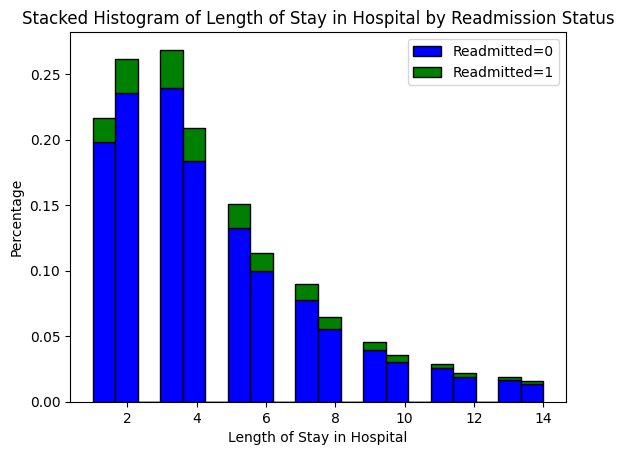

In [ ]:
train_data[train_data['length_of_stay_in_hospital'].isnull()==True]
#0 Nulls
readmitted_0 = train_data[train_data['readmitted_binary_numeric'] == 0]['length_of_stay_in_hospital']
readmitted_1 = train_data[train_data['readmitted_binary_numeric'] == 1]['length_of_stay_in_hospital']

# Plot histogram with stacked bars
plt.hist([readmitted_0, readmitted_1], bins=20, color=['blue', 'green'], edgecolor='black', density=True, label=['Readmitted=0', 'Readmitted=1'], stacked=True)
plt.xlabel('Length of Stay in Hospital')
plt.ylabel('Percentage')
plt.title('Stacked Histogram of Length of Stay in Hospital by Readmission Status')
plt.legend()
plt.show()

#Seems to be correlated to target

length_of_stay_values = train_data['length_of_stay_in_hospital'].values.reshape(-1, 1)
scaler = MinMaxScaler()
length_of_stay_scaled = scaler.fit_transform(length_of_stay_values)
train_data['length_of_stay_in_hospital'] = length_of_stay_scaled


In [ ]:
# Check for null values in the length_of_stay_in_hospital column in the test data
nulls_test = test_data[test_data['length_of_stay_in_hospital'].isnull()]

# Impute missing values in the test set using the mean from the training set
mean_length_of_stay_train = train_data['length_of_stay_in_hospital'].mean()
test_data.loc[nulls_test.index, 'length_of_stay_in_hospital'] = mean_length_of_stay_train

# Scale the 'length_of_stay_in_hospital' feature in the test data using the same scaler
length_of_stay_values_test = test_data['length_of_stay_in_hospital'].values.reshape(-1, 1)
length_of_stay_scaled_test = scaler.transform(length_of_stay_values_test)
test_data['length_of_stay_in_hospital'] = length_of_stay_scaled_test

### number_lab_tests

In [ ]:
train_data['number_lab_tests'].unique()

array([ 48,  71,  60,  47,  58,  59,  56,  55,  40,  51,  64,  67,  10,
        36,  25,  52,  22,  38,  42,  43,  57,   1,  44,  69,  12,  18,
        53,  41,  75,  89,  16,  77,  66,  35,  86,  37,  21,  61,  14,
        31,  27,  30,   4,  80,  28,   2,  72,  91,  17,  49,  32,  65,
        34,  78,  39,  45,  62,  54,  84,  23,  29,  70,  33,  24,  46,
         3,   9,  15,  50,  20,  63,  90,   7,   5,  79,  76,  92,  73,
        68, 100,  19,  83,   6,  93,  82,  26,  85,  13,  11,  87,   8,
        74, 113,  96, 101,  98,  88,  81,  95,  94, 111,  97, 103, 102,
        99, 121, 114, 109, 108, 104, 105, 118, 106, 107])

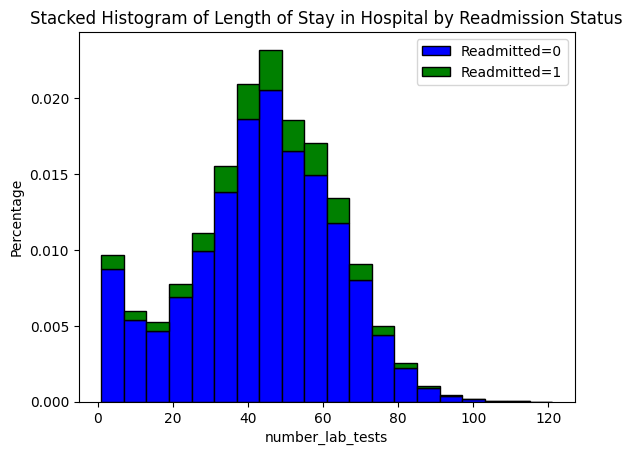

In [ ]:

train_data[train_data['number_lab_tests'].isnull()==True]

readmitted_0 = train_data[train_data['readmitted_binary_numeric'] == 0]['number_lab_tests']
readmitted_1 = train_data[train_data['readmitted_binary_numeric'] == 1]['number_lab_tests']

# Plot histogram with stacked bars
plt.hist([readmitted_0, readmitted_1], bins=20, color=['blue', 'green'], edgecolor='black', density=True, label=['Readmitted=0', 'Readmitted=1'], stacked=True)
plt.xlabel('number_lab_tests')
plt.ylabel('Percentage')
plt.title('Stacked Histogram of Length of Stay in Hospital by Readmission Status')
plt.legend()
plt.show()

number_lab_tests_values = train_data['number_lab_tests'].values.reshape(-1, 1)
train_data['number_lab_tests_scaled'] = scaler.fit_transform(number_lab_tests_values)

In [ ]:
# Check for null values in the number_lab_tests column in the test data
nulls_test = test_data[test_data['number_lab_tests'].isnull()]

# Impute missing values in the test set using the mean from the training set
mean_number_lab_tests_train = train_data['number_lab_tests'].mean()
test_data.loc[nulls_test.index, 'number_lab_tests'] = mean_number_lab_tests_train

# Scale the 'number_lab_tests' feature in the test data using the same scaler
number_lab_tests_values_test = test_data['number_lab_tests'].values.reshape(-1, 1)
number_lab_tests_scaled_test = scaler.transform(number_lab_tests_values_test)
test_data['number_lab_tests_scaled'] = number_lab_tests_scaled_test


### non_lab_procedures

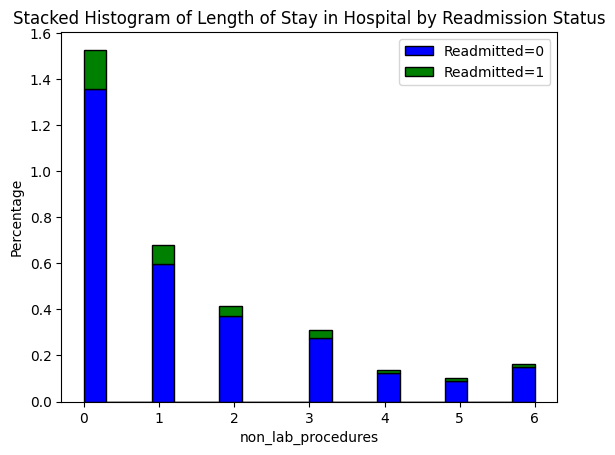

In [ ]:
train_data[train_data['non_lab_procedures'].isnull()==True]

readmitted_0 = train_data[train_data['readmitted_binary_numeric'] == 0]['non_lab_procedures']
readmitted_1 = train_data[train_data['readmitted_binary_numeric'] == 1]['non_lab_procedures']

# Plot histogram with stacked bars
plt.hist([readmitted_0, readmitted_1], bins=20, color=['blue', 'green'], edgecolor='black', density=True, label=['Readmitted=0', 'Readmitted=1'], stacked=True)
plt.xlabel('non_lab_procedures')
plt.ylabel('Percentage')
plt.title('Stacked Histogram of Length of Stay in Hospital by Readmission Status')
plt.legend()
plt.show()

non_lab_procedures_values = train_data['non_lab_procedures'].values.reshape(-1, 1)
train_data['non_lab_procedures_scaled'] = scaler.fit_transform(non_lab_procedures_values)

In [ ]:
# Assuming test_data is your test dataset

# Check for null values in the non_lab_procedures column in the test data
nulls_test = test_data[test_data['non_lab_procedures'].isnull()]

# Impute missing values in the test set using the mean from the training set
mean_non_lab_procedures_train = train_data['non_lab_procedures'].mean()
test_data.loc[nulls_test.index, 'non_lab_procedures'] = mean_non_lab_procedures_train

# Scale the 'non_lab_procedures' feature in the test data using the same scaler
non_lab_procedures_values_test = test_data['non_lab_procedures'].values.reshape(-1, 1)
non_lab_procedures_scaled_test = scaler.transform(non_lab_procedures_values_test)
test_data['non_lab_procedures_scaled'] = non_lab_procedures_scaled_test


### number_of_medications



In [ ]:
train_data['number_of_medications'].unique()

array([20, 25, 22,  9, 15, 10, 13, 39, 16, 21, 17, 28,  3, 12, 18, 34,  8,
       14, 11, 33, 32, 29, 27, 19, 45,  6,  7, 38, 24, 43, 26, 23,  5, 42,
       30, 58,  4, 59, 57, 37,  1, 35,  2, 36, 48, 31, 40, 61, 41, 56, 63,
       50, 49, 62, 51, 46, 65, 54, 44, 52, 64, 47, 60, 66, 69, 70, 53, 55,
       68, 75, 67, 74])

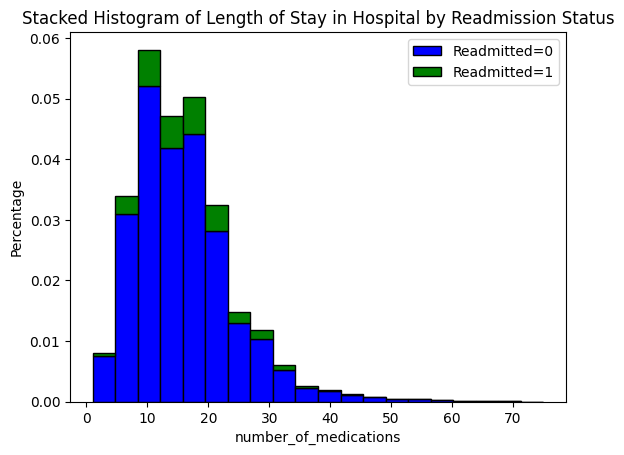

In [ ]:
train_data[train_data['number_of_medications'].isnull()==True]

readmitted_0 = train_data[train_data['readmitted_binary_numeric'] == 0]['number_of_medications']
readmitted_1 = train_data[train_data['readmitted_binary_numeric'] == 1]['number_of_medications']

# Plot histogram with stacked bars
plt.hist([readmitted_0, readmitted_1], bins=20, color=['blue', 'green'], edgecolor='black', density=True, label=['Readmitted=0', 'Readmitted=1'], stacked=True)
plt.xlabel('number_of_medications')
plt.ylabel('Percentage')
plt.title('Stacked Histogram of Length of Stay in Hospital by Readmission Status')
plt.legend()
plt.show()

number_of_medications_values = train_data['number_of_medications'].values.reshape(-1, 1)
train_data['number_of_medications_scaled'] = scaler.fit_transform(number_of_medications_values)

In [ ]:
# Check for null values in the number_of_medications column in the test data
nulls_test = test_data[test_data['number_of_medications'].isnull()]

# Impute missing values in the test set using the mean from the training set
mean_number_of_medications_train = train_data['number_of_medications'].mean()
test_data.loc[nulls_test.index, 'number_of_medications'] = mean_number_of_medications_train

# Scale the 'number_of_medications' feature in the test data using the same scaler
number_of_medications_values_test = test_data['number_of_medications'].values.reshape(-1, 1)
number_of_medications_scaled_test = scaler.transform(number_of_medications_values_test)
test_data['number_of_medications_scaled'] = number_of_medications_scaled_test

### primary_diagnosis/secundary_diagnosis/additional_diagnosis

In [ ]:
def remove_decimal(value):
    try:
        # Tenta converter para float
        float_value = float(value)
        # Retorna a parte inteira do valor
        return int(float_value)
    except ValueError:
        return value  # Retorna o valor original para valores não numéricos


# Apply the conversion function to each diagnosis column
train_data['primary_diagnosis'] = train_data['primary_diagnosis'].apply(remove_decimal)
train_data['secondary_diagnosis'] = train_data['secondary_diagnosis'].apply(remove_decimal)
train_data['additional_diagnosis'] = train_data['additional_diagnosis'].apply(remove_decimal)


icd_classes = {
    '001–139': range(1, 140),
    '140–239': range(140, 240),
    '240–279': range(240, 280),
    '280–289': range(280, 290),
    '290–319': range(290, 320),
    '320–389': range(320, 390),
    '390–459': range(390, 460),
    '460–519': range(460, 520),
    '520–579': range(520, 580),
    '580–629': range(580, 630),
    '630–679': range(630, 680),
    '680–709': range(680, 710),
    '710–739': range(710, 740),
    '740–759': range(740, 760),
    '760–779': range(760, 780),
    '780–799': range(780, 800),
    '800–999': range(800, 1000)
}


def map_icd_class(icd_code):
    try:
        icd_code_int = int(icd_code)
    except ValueError:
        return "V_E"

    for icd_class, icd_range in icd_classes.items():
        if icd_code_int in icd_range:
            return icd_class
    return 'Outros'



# Aplica a função de mapeamento para cada coluna
train_data['primary_diagnosis_class'] = train_data['primary_diagnosis'].map(map_icd_class)
train_data['secondary_diagnosis_class'] = train_data['secondary_diagnosis'].map(map_icd_class)
train_data['additional_diagnosis_class'] = train_data['additional_diagnosis'].map(map_icd_class)

train_data.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)


# Function to calculate the percentage of each class in a column
def calculate_percentage(column):
    counts = column.value_counts()
    percentages = counts / len(column) * 100
    return percentages

# Apply the calculation to each diagnosis column
percentage_primary = calculate_percentage(train_data['primary_diagnosis_class'])
percentage_secondary = calculate_percentage(train_data['secondary_diagnosis_class'])
percentage_additional = calculate_percentage(train_data['additional_diagnosis_class'])

# Create a dictionary to store the mapping of each class to its percentage
percentage_mapping_primary = {class_: percentage for class_, percentage in zip(percentage_primary.index, percentage_primary)}
percentage_mapping_secondary = {class_: percentage for class_, percentage in zip(percentage_secondary.index, percentage_secondary)}
percentage_mapping_additional = {class_: percentage for class_, percentage in zip(percentage_additional.index, percentage_additional)}

# Replace each class with its percentage in each column
train_data['primary_diagnosis_class'] = train_data['primary_diagnosis_class'].map(percentage_mapping_primary)
train_data['secondary_diagnosis_class'] = train_data['secondary_diagnosis_class'].map(percentage_mapping_secondary)
train_data['additional_diagnosis_class'] = train_data['additional_diagnosis_class'].map(percentage_mapping_additional)

# Print the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender admission_type  \
0        533253     USA       70110        Caucasian       1      Emergency   
1        426224     USA    29775006  AfricanAmerican       0      Emergency   
2        634063     USA    80729253        Caucasian       1            NaN   
3        890610     USA     2919042  AfricanAmerican       0      Emergency   
4        654194     USA    84871971        Caucasian       1       Elective   

   average_pulse_bpm                             admission_source  \
0           1.188721                               Emergency Room   
1           1.232123                              Clinic Referral   
2          -0.243527                                          NaN   
3          -0.807746   Transfer from another health care facility   
4           1.145320                           Physician Referral   

   length_of_stay_in_hospital  number_lab_tests  ...  \
0                    0.076923                48  ...  

In [ ]:
# Assuming test_data is your test dataset

# Apply the conversion function to each diagnosis column in the test data
test_data['primary_diagnosis'] = test_data['primary_diagnosis'].apply(remove_decimal)
test_data['secondary_diagnosis'] = test_data['secondary_diagnosis'].apply(remove_decimal)
test_data['additional_diagnosis'] = test_data['additional_diagnosis'].apply(remove_decimal)

# Appliying the mapping function to each column in the test_data
test_data['primary_diagnosis_class'] = test_data['primary_diagnosis'].map(map_icd_class)
test_data['secondary_diagnosis_class'] = test_data['secondary_diagnosis'].map(map_icd_class)
test_data['additional_diagnosis_class'] = test_data['additional_diagnosis'].map(map_icd_class)

# Remove the original diagnosis columns
test_data.drop(['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], axis=1, inplace=True)

# Replace each class with its percentage in each column in the test_data
test_data['primary_diagnosis_class'] = test_data['primary_diagnosis_class'].map(percentage_mapping_primary)
test_data['secondary_diagnosis_class'] = test_data['secondary_diagnosis_class'].map(percentage_mapping_secondary)
test_data['additional_diagnosis_class'] = test_data['additional_diagnosis_class'].map(percentage_mapping_additional)


In [ ]:
print(train_data.columns)

Index(['encounter_id', 'country', 'patient_id', 'race', 'gender',
       'admission_type', 'average_pulse_bpm', 'admission_source',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds_during_hospitalization',
       'prescribed_diabetes_meds', 'medication', 'readmitted_binary',
       'readmitted_multiclass', 'readmitted_binary_numeric',
       'readmitted_multiclass_encoded', 'race_AfricanAmerican',
       'race_Caucasian', 'race_Others', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'admission_type_grouped',
       'admission_type_Elective', 'admission_type_Emergency',
       'admission_type_Other', 'admission_type_Urgent',
       'admission_source_grouped', 'admission_source_ Emergency Room',
       'admission_source_ Physician Referral', 

### number_diagnoses

In [ ]:
train_data['number_diagnoses'] = pd.to_numeric(train_data['number_diagnoses'].replace('3 & less', 3), errors='coerce')
test_data['number_diagnoses'] = pd.to_numeric(test_data['number_diagnoses'].replace('3 & less', 3), errors='coerce')


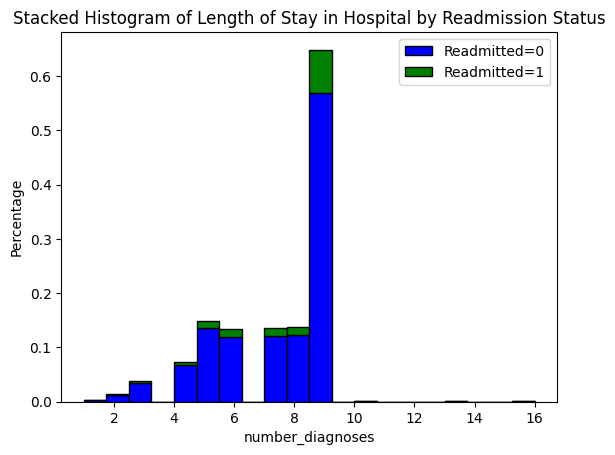

In [ ]:
readmitted_0 = train_data[train_data['readmitted_binary_numeric'] == 0]['number_diagnoses']
readmitted_1 = train_data[train_data['readmitted_binary_numeric'] == 1]['number_diagnoses']

# Plot histogram with stacked bars
plt.hist([readmitted_0, readmitted_1], bins=20, color=['blue', 'green'], edgecolor='black', density=True, label=['Readmitted=0', 'Readmitted=1'], stacked=True)
plt.xlabel('number_diagnoses')
plt.ylabel('Percentage')
plt.title('Stacked Histogram of Length of Stay in Hospital by Readmission Status')
plt.legend()
plt.show()

number_diagnoses_values = train_data['number_diagnoses'].values.reshape(-1, 1)
train_data['number_diagnoses_scaled'] = scaler.fit_transform(number_diagnoses_values)

In [ ]:
# Scale the 'number_diagnoses' feature in the test data using the same scaler
number_diagnoses_values_test = test_data['number_diagnoses'].values.reshape(-1, 1)
number_diagnoses_scaled_test = scaler.transform(number_diagnoses_values_test)
test_data['number_diagnoses_scaled'] = number_diagnoses_scaled_test

### glucose_test_result

In [ ]:
# Considering that the glucose_test_result column has 94% missing values and no apparent correlation to the target, we have decided to drop it.

# Drop the 'glucose_test_result' column
train_data = train_data.drop(columns=['glucose_test_result'])
test_data = test_data.drop(columns=['glucose_test_result'])
# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender admission_type  \
0        533253     USA       70110        Caucasian       1      Emergency   
1        426224     USA    29775006  AfricanAmerican       0      Emergency   
2        634063     USA    80729253        Caucasian       1            NaN   
3        890610     USA     2919042  AfricanAmerican       0      Emergency   
4        654194     USA    84871971        Caucasian       1       Elective   

   average_pulse_bpm                             admission_source  \
0           1.188721                               Emergency Room   
1           1.232123                              Clinic Referral   
2          -0.243527                                          NaN   
3          -0.807746   Transfer from another health care facility   
4           1.145320                           Physician Referral   

   length_of_stay_in_hospital  number_lab_tests  ...  \
0                    0.076923                48  ...  

### a1c_test_result

In [ ]:
# Considering that the a1c_test_result column has 83% missing values and no apparent correlation to the target, we have decided to drop it.

# Drop the 'a1c_test_result' column
train_data = train_data.drop(columns=['a1c_test_result'])
test_data = test_data.drop(columns=['a1c_test_result'])
# Check the updated DataFrame
print(train_data.head())

   encounter_id country  patient_id             race  gender admission_type  \
0        533253     USA       70110        Caucasian       1      Emergency   
1        426224     USA    29775006  AfricanAmerican       0      Emergency   
2        634063     USA    80729253        Caucasian       1            NaN   
3        890610     USA     2919042  AfricanAmerican       0      Emergency   
4        654194     USA    84871971        Caucasian       1       Elective   

   average_pulse_bpm                             admission_source  \
0           1.188721                               Emergency Room   
1           1.232123                              Clinic Referral   
2          -0.243527                                          NaN   
3          -0.807746   Transfer from another health care facility   
4           1.145320                           Physician Referral   

   length_of_stay_in_hospital  number_lab_tests  ...  \
0                    0.076923                48  ...  

### change_in_meds_during_hospitalization

In [ ]:
# We transform the change_in_meds_during_hospitalization column into binary (True-Ch, False-No).

# Convert 'change_in_meds_during_hospitalization' to binary
train_data['change_in_meds_during_hospitalization'] = (train_data['change_in_meds_during_hospitalization'] == 'Ch')
train_data['change_in_meds_during_hospitalization'] = train_data['change_in_meds_during_hospitalization'].replace({True: 1, False: 0})
# Check the updated DataFrame
print(train_data['change_in_meds_during_hospitalization'].value_counts())

0    38325
1    32908
Name: change_in_meds_during_hospitalization, dtype: int64


In [ ]:
# Convert 'change_in_meds_during_hospitalization' to binary in the test data as well
test_data['change_in_meds_during_hospitalization'] = (test_data['change_in_meds_during_hospitalization'] == 'Ch')
test_data['change_in_meds_during_hospitalization'] = test_data['change_in_meds_during_hospitalization'].replace({True: 1, False: 0})

### prescribed_diabetes_meds

In [ ]:
# We transform the prescribed_diabetes_meds column into binary (True-Yes, False-No).

# Convert 'prescribed_diabetes_meds' to binary
train_data['prescribed_diabetes_meds'] = (train_data['prescribed_diabetes_meds'] == 'Yes')
train_data['prescribed_diabetes_meds'] = train_data['prescribed_diabetes_meds'].replace({True: 1, False: 0})

# Convert 'prescribed_diabetes_meds' to binary in the test data
test_data['prescribed_diabetes_meds'] = (test_data['prescribed_diabetes_meds'] == 'Yes')
test_data['prescribed_diabetes_meds'] = test_data['prescribed_diabetes_meds'].replace({True: 1, False: 0})

# Check the updated DataFrame
print(train_data['prescribed_diabetes_meds'].value_counts())

1    54888
0    16345
Name: prescribed_diabetes_meds, dtype: int64


In [ ]:
print(train_data['encounter_id'].duplicated().sum())

0


### medication

In [ ]:
train_data['medication'] = train_data['medication'].apply(lambda x: eval(x) if isinstance(x, str) else x if isinstance(x, list) else [])
m2m_encounter_medication = pd.get_dummies(train_data.explode('medication'), columns=['medication'])

m2m_encounter_medication.set_index('encounter_id', inplace=True)

m2m_encounter_medication
#print(m2m_encounter_medication.isnull().sum())

,country,patient_id,race,gender,admission_type,average_pulse_bpm,admission_source,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,...,medication_metformin-pioglitazone,medication_metformin-rosiglitazone,medication_miglitol,medication_nateglinide,medication_pioglitazone,medication_repaglinide,medication_rosiglitazone,medication_tolazamide,medication_tolbutamide,medication_troglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,1,Emergency,1.188721,Emergency Room,0.076923,48,0,...,0,0,0,0,0,0,0,0,0,0
426224,USA,29775006,AfricanAmerican,0,Emergency,1.232123,Clinic Referral,1.000000,71,0,...,0,0,0,0,0,0,0,0,0,0
634063,USA,80729253,Caucasian,1,NaN,-0.243527,NaN,0.384615,60,1,...,0,0,0,0,0,0,0,0,0,0
634063,USA,80729253,Caucasian,1,NaN,-0.243527,NaN,0.384615,60,1,...,0,0,0,0,0,0,0,0,0,0
890610,USA,2919042,AfricanAmerican,0,Emergency,-0.807746,Transfer from another health care facility,0.384615,48,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332030,USA,23397147,Caucasian,1,NaN,1.622736,NaN,0.307692,25,0,...,0,0,0,0,0,0,0,0,0,0
332030,USA,23397147,Caucasian,1,NaN,1.622736,NaN,0.307692,25,0,...,0,0,0,0,0,0,0,0,0,0
757560,USA,52161750,Caucasian,0,Emergency,1.015115,Emergency Room,0.076923,34,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply the same transformation to 'medication' in the test data
test_data['medication'] = test_data['medication'].apply(lambda x: eval(x) if isinstance(x, str) else x if isinstance(x, list) else [])
m2m_encounter_medication_test = pd.get_dummies(test_data.explode('medication'), columns=['medication'])

m2m_encounter_medication_test.set_index('encounter_id', inplace=True)

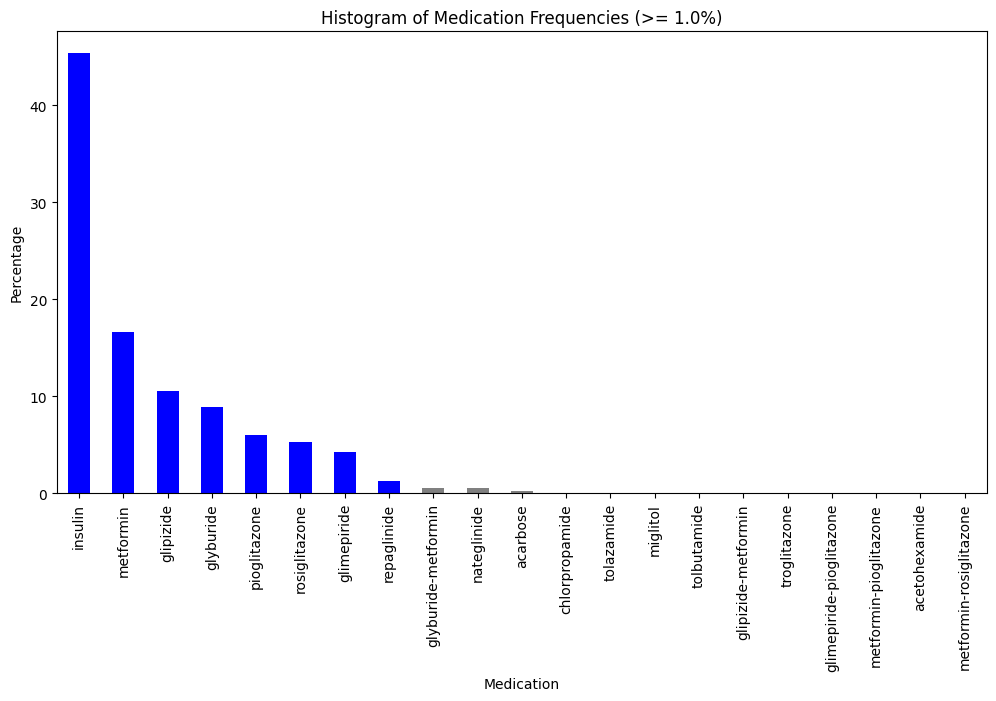

       encounter_id  glimepiride  glipizide  glyburide  insulin  metformin  \
0            100020            0          0          0        1          0   
1            100022            0          0          1        1          1   
2            100078            1          0          0        1          0   
3            100080            0          0          0        1          0   
4            100087            0          0          1        0          0   
...             ...          ...        ...        ...      ...        ...   
54539        999928            0          0          0        0          1   
54540        999953            0          0          0        0          0   
54541        999966            0          0          0        1          0   
54542        999968            0          1          0        1          0   
54543        999980            0          0          0        1          0   

       pioglitazone  repaglinide  rosiglitazone  
0            

In [ ]:
#
train_data['medication'] = train_data['medication'].apply(lambda x: eval(x) if isinstance(x, str) else x if isinstance(x, list) else [])
m2m_encounter_medication = train_data.explode('medication')[['encounter_id', 'medication']].dropna(subset=['medication'])
m2m_encounter_medication.set_index('encounter_id', inplace=True)

threshold_percentage = 1.0  # Adjust as needed

# Calculate percentages
total_encounters = len(m2m_encounter_medication)
medication_counts = m2m_encounter_medication['medication'].value_counts()
medication_percentages = (medication_counts / total_encounters) * 100

# Define colors based on the threshold
colors = np.where(medication_percentages >= threshold_percentage, 'blue', 'gray')

# Plotting histogram with different colors
plt.figure(figsize=(12, 6))
medication_percentages.plot(kind='bar', color=colors)
plt.title(f'Histogram of Medication Frequencies (>= {threshold_percentage}%)')
plt.xlabel('Medication')
plt.ylabel('Percentage')
plt.show()

selected_medications = medication_percentages[medication_percentages >= threshold_percentage]

binary_encoded = pd.get_dummies(m2m_encounter_medication['medication'][m2m_encounter_medication['medication'].isin(selected_medications.index)])

# Assuming binary_encoded is the DataFrame you provided

# Group by 'encounter_id' and aggregate the sum for each medication
consolidated_binary_encoded = binary_encoded.groupby('encounter_id').sum()

# Reset the index to make 'encounter_id' a column again
consolidated_binary_encoded.reset_index(inplace=True)

print(consolidated_binary_encoded)


train_data = train_data.merge(consolidated_binary_encoded, left_on='encounter_id', right_on='encounter_id', how='left')

#Fill NaN values with 0 (indicating absence of medication)
train_data[selected_medications.index] = train_data[selected_medications.index].fillna(0).astype(int)





In [ ]:
# Apply the same conversion to list for 'medication' in the test data
test_data['medication'] = test_data['medication'].apply(lambda x: eval(x) if isinstance(x, str) else x if isinstance(x, list) else [])

# Explode and filter the 'medication' column in the test data
m2m_encounter_medication_test = test_data.explode('medication')[['encounter_id', 'medication']].dropna(subset=['medication'])
m2m_encounter_medication_test.set_index('encounter_id', inplace=True)

# Visualization and Thresholding (using the same threshold as in the training data)
threshold_percentage = 1.0  # Adjust as needed
total_encounters_test = len(m2m_encounter_medication_test)
medication_counts_test = m2m_encounter_medication_test['medication'].value_counts()
medication_percentages_test = (medication_counts_test / total_encounters_test) * 100
selected_medications_test = medication_percentages_test[medication_percentages_test >= threshold_percentage]

# One-hot encoding for selected medications in the test data
binary_encoded_test = pd.get_dummies(m2m_encounter_medication_test['medication'][m2m_encounter_medication_test['medication'].isin(selected_medications_test.index)])

# Consolidate binary encoding for the test data
consolidated_binary_encoded_test = binary_encoded_test.groupby('encounter_id').sum()
consolidated_binary_encoded_test.reset_index(inplace=True)

# Merge the consolidated binary encoding with the test data
test_data = test_data.merge(consolidated_binary_encoded_test, left_on='encounter_id', right_on='encounter_id', how='left')

# Fill NaN values with 0 (indicating absence of medication)
test_data[selected_medications_test.index] = test_data[selected_medications_test.index].fillna(0).astype(int)


In [ ]:
print(train_data)

       encounter_id country  patient_id             race  gender  \
0            533253     USA       70110        Caucasian       1   
1            426224     USA    29775006  AfricanAmerican       0   
2            634063     USA    80729253        Caucasian       1   
3            890610     USA     2919042  AfricanAmerican       0   
4            654194     USA    84871971        Caucasian       1   
...             ...     ...         ...              ...     ...   
71228        660160     USA    24531381  AfricanAmerican       1   
71229        826429     USA     4663818  AfricanAmerican       1   
71230        332030     USA    23397147        Caucasian       1   
71231        757560     USA    52161750        Caucasian       0   
71232        459757     USA    88410897        Caucasian       0   

      admission_type  average_pulse_bpm  \
0          Emergency           1.188721   
1          Emergency           1.232123   
2                NaN          -0.243527   
3          

In [ ]:
print(train_data[["prescribed_diabetes_meds","insulin"]])
train_data[train_data['prescribed_diabetes_meds']!=train_data['insulin']][["prescribed_diabetes_meds","insulin"]]
#Not the same

       prescribed_diabetes_meds  insulin
0                             0        0
1                             1        1
2                             1        1
3                             0        0
4                             0        0
...                         ...      ...
71228                         1        1
71229                         1        0
71230                         1        1
71231                         1        1
71232                         1        1

[71233 rows x 2 columns]


,prescribed_diabetes_meds,insulin
6,1,0
26,1,0
28,1,0
29,1,0
34,1,0
...,...,...
71204,1,0
71208,1,0
71211,1,0
71225,1,0


### Check for duplicates

In [ ]:
subset_columns = ['race_Caucasian',
                  'race_AfricanAmerican',
                  'race_Others',
                  'gender',
                  'admission_type_Emergency',
                  'admission_type_Elective',
                  'admission_type_Urgent',
                  'admission_type_Other',
                  'average_pulse_bpm',
                  'admission_source_ Emergency Room',
                  'admission_source_ Physician Referral',
                  'admission_source_Other',
                  'length_of_stay_in_hospital',
                  'number_lab_tests_scaled',
                  'non_lab_procedures_scaled',
                  'number_of_medications_scaled',
                  'primary_diagnosis_class',
                  'secondary_diagnosis_class',
                  'additional_diagnosis_class',
                  'number_diagnoses_scaled',
                  'change_in_meds_during_hospitalization',
                  'prescribed_diabetes_meds',
                  'glimepiride',
                  'glipizide',
                  'glyburide',
                  'insulin',
                  'metformin',
                  'pioglitazone',
                  'repaglinide',
                  'rosiglitazone',
                  'readmitted_binary_numeric',
                  'readmitted_multiclass_encoded']

column_data_types = train_data[subset_columns].dtypes
print("Data types of each column in the subset:")
print(column_data_types)

duplicates_train = train_data.duplicated(subset=subset_columns)
print(f"Number of duplicates in train_data: {duplicates_train.sum()}")

Data types of each column in the subset:
race_Caucasian                             uint8
race_AfricanAmerican                       uint8
race_Others                                uint8
gender                                     int64
admission_type_Emergency                   uint8
admission_type_Elective                    uint8
admission_type_Urgent                      uint8
admission_type_Other                       uint8
average_pulse_bpm                        float64
admission_source_ Emergency Room           uint8
admission_source_ Physician Referral       uint8
admission_source_Other                     uint8
length_of_stay_in_hospital               float64
number_lab_tests_scaled                  float64
non_lab_procedures_scaled                float64
number_of_medications_scaled             float64
primary_diagnosis_class                  float64
secondary_diagnosis_class                float64
additional_diagnosis_class               float64
number_diagnoses_scaled     

### Dealing with outliers

Percentage of outliers removed for average_pulse_bpm: 0.00%
Percentage of outliers removed for length_of_stay_in_hospital: 2.22%
Percentage of outliers removed for number_lab_tests_scaled: 0.16%
Percentage of outliers removed for non_lab_procedures_scaled: 4.88%
Percentage of outliers removed for number_of_medications_scaled: 2.52%
Percentage of outliers removed for number_diagnoses_scaled: 0.29%


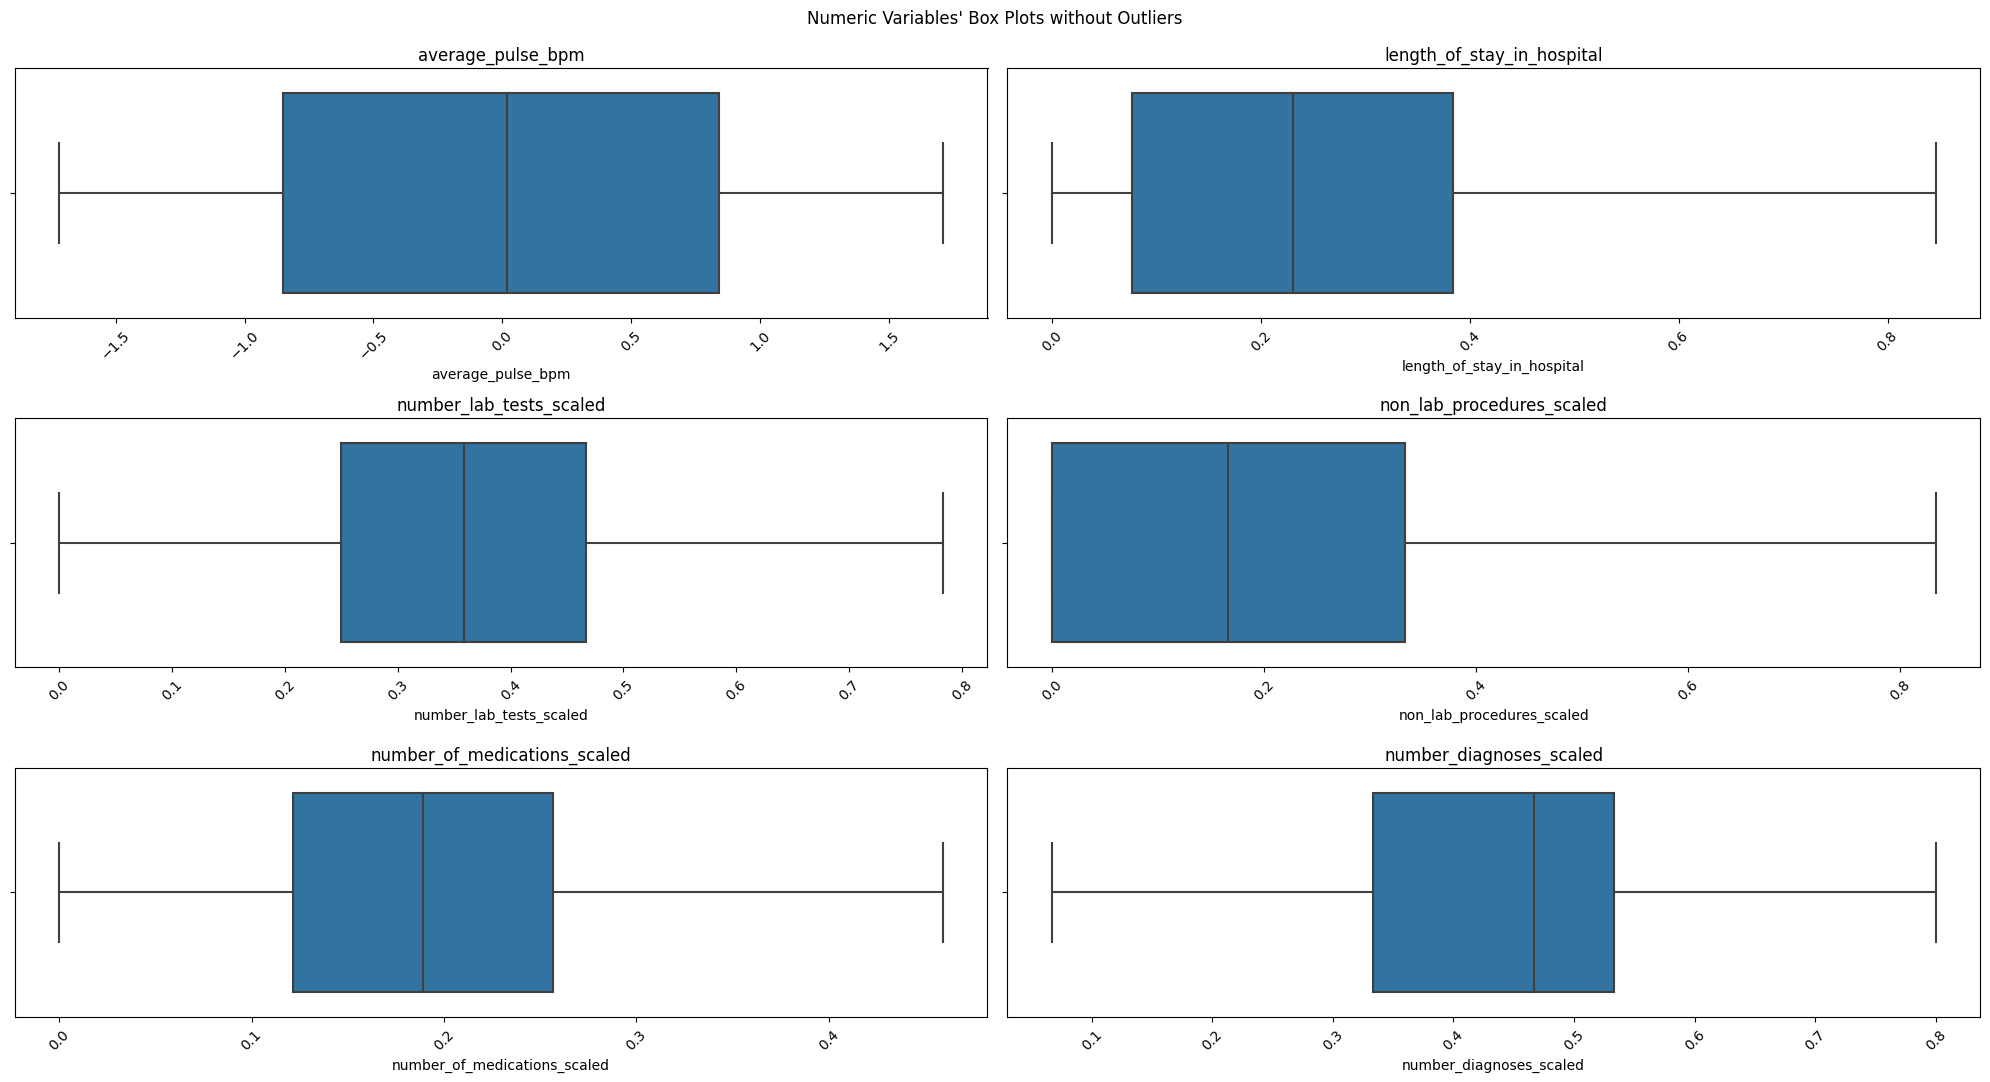

In [ ]:
subset_columns_outliers = [
                  'average_pulse_bpm',
                  'length_of_stay_in_hospital',
                  'number_lab_tests_scaled',
                  'non_lab_procedures_scaled',
                  'number_of_medications_scaled',
                  'number_diagnoses_scaled',]

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the percentage of outliers removed
    num_total_data_points = len(df)
    num_outliers_removed = num_total_data_points - len(df[(df[column] >= lower_bound) & (df[column] <= upper_bound)])
    percentage_removed = (num_outliers_removed / num_total_data_points) * 100

    # Print the percentage of outliers removed
    print(f"Percentage of outliers removed for {column}: {percentage_removed:.2f}%")

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Select numeric features for box plots
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for subplots
num_rows = len(subset_columns_outliers) // 2
num_cols = 2

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), subset_columns_outliers):
    # Remove outliers for the current feature
    data_no_outliers = remove_outliers(train_data, feat)

    # Plot box plot without outliers
    sns.boxplot(x=data_no_outliers[feat], ax=ax)
    ax.set_title(feat)  # Set title for each subplot
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots without Outliers"
plt.suptitle(title)

plt.show()


NAN Values



In [ ]:
# Check for NaN values in training data
print("NaN values in training data:")
print(train_data.isnull().sum())

# Check for NaN values in test data
print("\nNaN values in test data:")
print(test_data.isnull().sum())


NaN values in training data:
encounter_id                                0
country                                     0
patient_id                                  0
race                                        0
gender                                      0
admission_type                           3706
average_pulse_bpm                           0
admission_source                         4718
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
number_diagnoses                            0
change_in_meds_during_hospitalization       0
prescribed_diabetes_meds                    0
medication                                  0
readmitted_binary                           0
readmitted_multiclass                       0
readmitted_binary_numeric                   0
readmitted_multiclass_encoded               0
race_AfricanAmerican                        0
race_

# **Feature Selection**

**Filters for Feature Selection**

In [ ]:
## Function to identify features with no variance

def univariate_variables(X_train):
    feat_no_var = X_train.var(numeric_only=True).loc[X_train.var(numeric_only=True) == 0].index.values
    return feat_no_var

In [ ]:
## Check for dependence between categorical variables

def check_independence(X,y,var,alpha=0.05):
    df_observed = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(df_observed.values)
    if p<alpha:
        return 1
    else:
        return 0

### Correlation Matrix

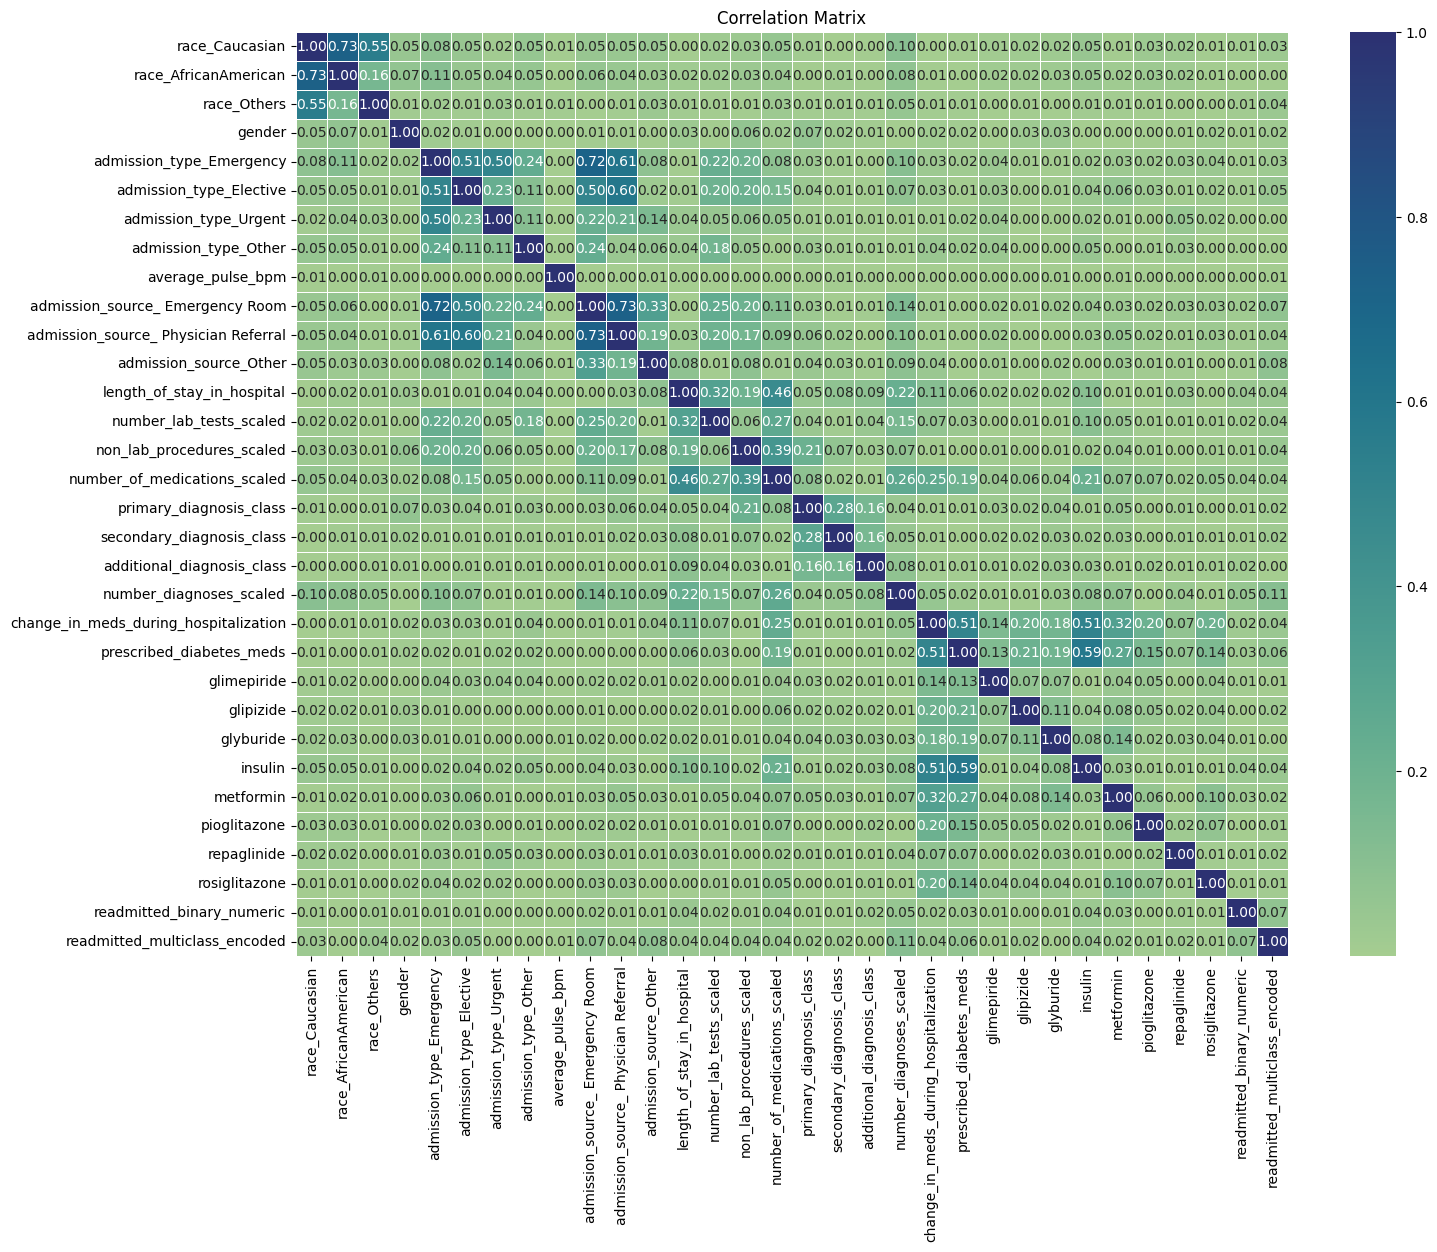

In [ ]:
pos_pp_train_data = train_data[subset_columns]

# Calculate the correlation matrix
correlation_matrix = pos_pp_train_data.corr()

# Create a heatmap for visualization
plt.figure(figsize=(16, 12))
sns.heatmap(np.abs(correlation_matrix), annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#Nothing bigger than 0.8 so we won't drop anything yet

### Feature Data Frame

In [ ]:
subset_startFeatures = ['race_Caucasian',
                  'race_AfricanAmerican',
                  'race_Others',
                  'gender',
                  'admission_type_Emergency',
                  'admission_type_Elective',
                  'admission_type_Urgent',
                  'admission_type_Other',
                  'average_pulse_bpm',
                  'admission_source_ Emergency Room',
                  'admission_source_ Physician Referral',
                  'admission_source_Other',
                  'length_of_stay_in_hospital',
                  'number_lab_tests_scaled',
                  'non_lab_procedures_scaled',
                  'number_of_medications_scaled',
                  'primary_diagnosis_class',
                  'secondary_diagnosis_class',
                  'additional_diagnosis_class',
                  'number_diagnoses_scaled',
                  'change_in_meds_during_hospitalization',
                  'prescribed_diabetes_meds',
                  'glimepiride',
                  'glipizide',
                  'glyburide',
                  'insulin',
                  'metformin',
                  'pioglitazone',
                  'repaglinide',
                  'rosiglitazone']


features = train_data[subset_startFeatures]



### Significant Features Binary

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind


target_variable_binary = 'readmitted_binary_numeric'

# Extract features and target variable
X = features
y = train_data[target_variable_binary]


In [ ]:
# 1. Correlation Analysis
correlation_matrix_binary = pd.concat([X, y], axis=1).corr()
correlation_features_binary = correlation_matrix_binary.index[abs(correlation_matrix_binary[target_variable_binary]) < 0.8]

In [ ]:
# 2. ANOVA
anova_selector_binary = SelectKBest(f_classif, k='all')
anova_selector_binary.fit(X, y)
anova_features_binary = X.columns[anova_selector_binary.get_support()]

In [ ]:
# 3. t-test for Binary Features
ttest_features_binary = []
for feature in X.columns:
    group_0 = X[y == 0][feature]
    group_1 = X[y == 1][feature]
    t_statistic, p_value = ttest_ind(group_0, group_1)
    if p_value < 0.05:
        ttest_features_binary.append(feature)

In [ ]:
# 4. Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
rfe_selector.fit(X, y)
rfe_features_binary = X.columns[rfe_selector.support_]

In [ ]:
# 5. Random Forest Feature Importance
rf_classifier.fit(X, y)
rf_feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_features_binary = rf_feature_importance.index[:10]

In [ ]:
# Combine all selected features




selected_features_binary = set(correlation_features_binary) & set(anova_features_binary) & set(ttest_features_binary) & set(rfe_features_binary) & set(rf_features_binary)

# Print or use the combined set of selected features
print("All Selected Features:", selected_features_binary)

All Selected Features: {'number_of_medications_scaled', 'additional_diagnosis_class', 'number_diagnoses_scaled', 'length_of_stay_in_hospital', 'number_lab_tests_scaled', 'non_lab_procedures_scaled'}


### Significant Features Multiclass

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind


target_variable_multiclass = 'readmitted_multiclass_encoded'

# Extract features and target variable
X = features
y = train_data[target_variable_multiclass]


In [ ]:
# 1. Correlation Analysis
correlation_matrix = pd.concat([X, y], axis=1).corr()
correlation_features_multiclass = correlation_matrix.index[abs(correlation_matrix[target_variable_multiclass]) < 0.8]

In [ ]:
# 2. ANOVA
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X, y)
anova_features_multiclass = X.columns[anova_selector.get_support()]

In [ ]:
# 3. t-test for Binary Features
ttest_features_multiclass = []
for feature in X.columns:
    group_0 = X[y == 0][feature]
    group_1 = X[y == 1][feature]
    t_statistic, p_value = ttest_ind(group_0, group_1)
    if p_value < 0.05:
        ttest_features_multiclass.append(feature)

In [ ]:
# 4. Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
rfe_selector.fit(X, y)
rfe_features_multiclass = X.columns[rfe_selector.support_]

In [ ]:
# 5. Random Forest Feature Importance
rf_classifier.fit(X, y)
rf_feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_features_multiclass = rf_feature_importance.index[:10]

In [ ]:
# Combine all selected features
selected_features_multiclass = set(correlation_features_multiclass) & set(anova_features_multiclass) & set(ttest_features_multiclass) & set(rfe_features_multiclass) & set(rf_features_multiclass)

# Print or use the combined set of selected features
print("All Selected Features:", selected_features_multiclass)

All Selected Features: {'number_of_medications_scaled', 'additional_diagnosis_class', 'number_diagnoses_scaled', 'primary_diagnosis_class', 'length_of_stay_in_hospital', 'gender', 'number_lab_tests_scaled', 'non_lab_procedures_scaled'}


##Selected Features

In [ ]:
final_features_multiclass = ['non_lab_procedures_scaled',
                  'number_diagnoses_scaled',
                  'primary_diagnosis_class',
                  'length_of_stay_in_hospital',
                  'additional_diagnosis_class',
                  'number_lab_tests_scaled',
                  'number_of_medications_scaled',
                  'gender']


final_features_binary = ['non_lab_procedures_scaled',
                         'number_diagnoses_scaled',
                         'length_of_stay_in_hospital',
                         'additional_diagnosis_class',
                         'number_lab_tests_scaled',
                         'number_of_medications_scaled']

In [ ]:
X_multiclass = features[final_features_multiclass]
y_multiclass = train_data['readmitted_multiclass_encoded']

X_binary = features[final_features_binary]
y_binary = train_data['readmitted_binary_numeric']

X_test_multi = test_data[final_features_multiclass]

X_test_bin = test_data[final_features_binary]

In [ ]:
X_binary

,non_lab_procedures_scaled,number_diagnoses_scaled,length_of_stay_in_hospital,additional_diagnosis_class,number_lab_tests_scaled,number_of_medications_scaled
0,0.000000,0.466667,0.076923,6.638777,0.391667,0.256757
1,0.000000,0.533333,1.000000,1.820785,0.583333,0.324324
2,0.166667,0.333333,0.384615,25.683321,0.491667,0.283784
3,0.333333,0.266667,0.384615,29.421757,0.391667,0.108108
4,0.166667,0.533333,0.384615,29.421757,0.383333,0.189189
...,...,...,...,...,...,...
71228,0.166667,0.533333,0.461538,25.683321,0.416667,0.229730
71229,0.000000,0.333333,0.615385,6.386085,0.158333,0.108108
71230,0.000000,0.533333,0.307692,25.683321,0.200000,0.310811
71231,0.166667,0.266667,0.076923,25.683321,0.275000,0.162162


#  Modeling

## Split the data and scaling

In [ ]:
# Split the data
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
X_train_multi, X_val_multi, y_train_multi, y_val_multi = train_test_split(X_multiclass, y_multiclass, test_size=0.3, random_state=42)


# Feature Scaling
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_val_bin_scaled = scaler_bin.transform(X_val_bin)

## Logistic regression

In [ ]:
# Split the data
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Feature Scaling
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_val_bin_scaled = scaler_bin.transform(X_val_bin)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set the desired class weights
class_weights = {0: 1, 1: 8}  # You can adjust the values based on the importance of each class

# Initialize the Logistic Regression model with custom class weights
custom_weight_lr_model_bin = LogisticRegression(class_weight=class_weights, random_state=42)

# Train the model
custom_weight_lr_model_bin.fit(X_train_bin_scaled, y_train_bin)

# Make predictions on the validation set
y_pred_custom_weight_lr_bin = custom_weight_lr_model_bin.predict(X_val_bin_scaled)

# Evaluate the model
accuracy_custom_weight_lr_bin = accuracy_score(y_val_bin, y_pred_custom_weight_lr_bin)
classification_report_custom_weight_lr_bin = classification_report(y_val_bin, y_pred_custom_weight_lr_bin)

# Print the results
print(f"Binary Classification Model (Logistic Regression) - Accuracy: {accuracy_custom_weight_lr_bin}")
print("Classification Report with Custom Class Weights:\n", classification_report_custom_weight_lr_bin)

Binary Classification Model (Logistic Regression) - Accuracy: 0.49484101916192885
Classification Report with Custom Class Weights:
               precision    recall  f1-score   support

           0       0.91      0.48      0.63     12715
           1       0.12      0.61      0.21      1532

    accuracy                           0.49     14247
   macro avg       0.52      0.54      0.42     14247
weighted avg       0.83      0.49      0.58     14247



Normal

In [ ]:
# Model Training
logistic_regression_model_bin = LogisticRegression(class_weight={0: 2, 1: 13}, penalty='l2', max_iter=5000)
#class_weight is needed because there are many more records for result 0 compared to ones for result 1
logistic_regression_model_bin.fit(X_train_bin_scaled, y_train_bin)

# Model Evaluation
y_pred_bin = logistic_regression_model_bin.predict(X_val_bin_scaled)

# Evaluate the model
accuracy_bin = accuracy_score(y_val_bin, y_pred_bin)
classification_report_bin = classification_report(y_val_bin, y_pred_bin)

# Print results
print(f"Binary Classification Model (Logistic Regression) - Accuracy: {accuracy_bin}")
print("Classification Report:\n", classification_report_bin)

Binary Classification Model (Logistic Regression) - Accuracy: 0.7557380501158139
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     12715
           1       0.13      0.23      0.17      1532

    accuracy                           0.76     14247
   macro avg       0.51      0.52      0.51     14247
weighted avg       0.82      0.76      0.78     14247



## Random Forest

Maximizing f1

In [ ]:
# Random Forest for Binary Classification
rf_model_bin = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=50, max_depth=15, min_samples_split=10, min_samples_leaf=10)
rf_model_bin.fit(X_train_bin, y_train_bin)
y_pred_rf_bin = rf_model_bin.predict(X_val_bin)

# Assuming y_pred_prob is the predicted probabilities for class 1 from Random Forest
y_pred_prob = rf_model_bin.predict_proba(X_val_bin)[:, 1]

# Adjust the threshold as needed
threshold = 0.3
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Evaluate the Random Forest model for Binary Classification
accuracy_rf_bin = accuracy_score(y_val_bin, y_pred_adjusted)
classification_report_rf_bin = classification_report(y_val_bin, y_pred_adjusted)

# Print results
print(f"Random Forest Model (Binary) - Accuracy: {accuracy_rf_bin}")
print("Classification Report:\n", classification_report_rf_bin)

Random Forest Model (Binary) - Accuracy: 0.2638450200042114
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.19      0.32     12715
           1       0.11      0.86      0.20      1532

    accuracy                           0.26     14247
   macro avg       0.52      0.53      0.26     14247
weighted avg       0.83      0.26      0.30     14247



Normal

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler  # Import RandomOverSampler

# Assuming you have loaded and preprocessed your data
# X_train_bin, X_val_bin, y_train_bin, y_val_bin

# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

# Fit and transform the training data
X_train_bin_oversampled, y_train_bin_oversampled = oversampler.fit_resample(X_train_bin, y_train_bin)

# Random Forest for Binary Classification with oversampling
rf_model_bin_oversampled = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=50, max_depth=15, min_samples_split=10, min_samples_leaf=10)
rf_model_bin_oversampled.fit(X_train_bin_oversampled, y_train_bin_oversampled)

# Make predictions on the validation set
y_pred_rf_bin_oversampled = rf_model_bin_oversampled.predict(X_val_bin)

# Assuming y_pred_prob is the predicted probabilities for class 1 from Random Forest
y_pred_prob_oversampled = rf_model_bin_oversampled.predict_proba(X_val_bin)[:, 1]

# Adjust the threshold as needed
threshold = 0.5
y_pred_adjusted_oversampled = (y_pred_prob_oversampled > threshold).astype(int)

# Evaluate the Random Forest model with oversampling for Binary Classification
accuracy_rf_bin_oversampled = accuracy_score(y_val_bin, y_pred_adjusted_oversampled)
classification_report_rf_bin_oversampled = classification_report(y_val_bin, y_pred_adjusted_oversampled)

# Print results
print(f"Random Forest Model (Binary) with Oversampling - Accuracy: {accuracy_rf_bin_oversampled}")
print("Classification Report:\n", classification_report_rf_bin_oversampled)


Random Forest Model (Binary) with Oversampling - Accuracy: 0.6690531339931214
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79     12715
           1       0.13      0.37      0.19      1532

    accuracy                           0.67     14247
   macro avg       0.52      0.54      0.49     14247
weighted avg       0.82      0.67      0.73     14247



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_sample_weight  # Import compute_sample_weight

# Assuming you have loaded and preprocessed your data
# X_train_bin, X_val_bin, y_train_bin, y_val_bin

# Compute sample weights for class balancing
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_bin)

# Gradient Boosting for Binary Classification
gb_model_bin = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=1, max_depth=5, min_samples_leaf=1)
gb_model_bin.fit(X_train_bin, y_train_bin, sample_weight=sample_weights)
y_pred_gb_bin = gb_model_bin.predict(X_val_bin)

y_pred_prob_gb = gb_model_bin.predict_proba(X_val_bin)[:, 1]
threshold = 0.5
y_pred_adjusted_gb = (y_pred_prob_gb > threshold).astype(int)

# Evaluate the Gradient Boosting model for Binary Classification
accuracy_gb_bin = accuracy_score(y_val_bin, y_pred_adjusted_gb)
classification_report_gb_bin = classification_report(y_val_bin, y_pred_adjusted_gb)

# Print results
print(f"Gradient Boosting Model (Binary) - Accuracy: {accuracy_gb_bin}")
print("Classification Report:\n", classification_report_gb_bin)


Gradient Boosting Model (Binary) - Accuracy: 0.6548045202498771
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78     12715
           1       0.13      0.37      0.19      1532

    accuracy                           0.65     14247
   macro avg       0.51      0.53      0.48     14247
weighted avg       0.82      0.65      0.72     14247



##MLP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Criando e treinando a Rede Neural
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_bin_scaled, y_train_bin)

# Fazendo previsões no conjunto de validação
y_pred_proba_bin = mlp_model.predict_proba(X_val_bin_scaled)[:, 1]

# Ajuste do limiar (experimente diferentes valores)
threshold_bin = 0.3
y_pred_adjusted_bin = (y_pred_proba_bin > threshold_bin).astype(int)

# Avaliando o desempenho do modelo ajustado
accuracy_adjusted_bin = accuracy_score(y_val_bin, y_pred_adjusted_bin)
classification_report_adjusted_bin = classification_report(y_val_bin, y_pred_adjusted_bin)

# Exibindo os resultados
print(f"Acurácia da Rede Neural Ajustada: {accuracy_adjusted_bin}")
print("Relatório de Classificação Ajustado:\n", classification_report_adjusted_bin)

Acurácia da Rede Neural Ajustada: 0.8924685898785709
Relatório de Classificação Ajustado:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     12715
           1       0.00      0.00      0.00      1532

    accuracy                           0.89     14247
   macro avg       0.45      0.50      0.47     14247
weighted avg       0.80      0.89      0.84     14247



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy=.5, random_state=42)

# Fit and transform the training data
X_train_bin_oversampled, y_train_bin_oversampled = oversampler.fit_resample(X_train_bin_scaled, y_train_bin)

# Standardize the oversampled data (
scaler = StandardScaler()
X_train_bin_oversampled_scaled = scaler.fit_transform(X_train_bin_oversampled)

# Create and train the MLP model on the oversampled data
mlp_model_oversampled = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model_oversampled.fit(X_train_bin_oversampled_scaled, y_train_bin_oversampled)

# Make predictions on the validation set
y_pred_proba_oversampled = mlp_model_oversampled.predict_proba(X_val_bin_scaled)[:, 1]

# Adjust the threshold as needed
threshold = 0.3
y_pred_adjusted_oversampled = (y_pred_proba_oversampled > threshold).astype(int)

# Evaluate the performance of the adjusted model on the validation set
accuracy_adjusted_oversampled = accuracy_score(y_val_bin, y_pred_adjusted_oversampled)
classification_report_adjusted_oversampled = classification_report(y_val_bin, y_pred_adjusted_oversampled)

# Display the results
print(f"Acurácia da Rede Neural Ajustada com Oversampling: {accuracy_adjusted_oversampled}")
print("Relatório de Classificação Ajustado com Oversampling:\n", classification_report_adjusted_oversampled)


Acurácia da Rede Neural Ajustada com Oversampling: 0.42584403734119464
Relatório de Classificação Ajustado com Oversampling:
               precision    recall  f1-score   support

           0       0.91      0.40      0.55     12715
           1       0.12      0.68      0.20      1532

    accuracy                           0.43     14247
   macro avg       0.52      0.54      0.38     14247
weighted avg       0.83      0.43      0.51     14247



##XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# XGBoost Model for Binary Classification
xgb_model_bin = XGBClassifier(random_state=42)

# Define the parameter grid for XGBoost hyperparameter tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5],
    'n_estimators': [50, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 10]  # Adjust this based on class imbalance
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    xgb_model_bin,
    param_grid_xgb,
    scoring='f1',  # Use F1-score for binary classification
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search_xgb.fit(X_train_bin, y_train_bin)

# Get the best hyperparameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_

# Update the XGBoost model with the best hyperparameters
xgb_model_bin.set_params(**best_params_xgb)

# Train the XGBoost model
xgb_model_bin.fit(X_train_bin, y_train_bin)

# Predictions on the validation set
y_pred_prob_xgb = xgb_model_bin.predict_proba(X_val_bin)[:, 1]
threshold = 0.5  # Adjust this threshold as needed
y_pred_adjusted_xgb = (y_pred_prob_xgb > threshold).astype(int)

# Evaluate the XGBoost model for Binary Classification
accuracy_xgb_bin = accuracy_score(y_val_bin, y_pred_adjusted_xgb)
classification_report_xgb_bin = classification_report(y_val_bin, y_pred_adjusted_xgb)

# Print results
print(f"XGBoost Model (Binary) - Accuracy: {accuracy_xgb_bin}")
print("Classification Report:\n", classification_report_xgb_bin)



Fitting 5 folds for each of 64 candidates, totalling 320 fits


KeyboardInterrupt: ignored

## Decision Tree

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

# Fit and transform the training data
X_train_bin_oversampled, y_train_bin_oversampled = oversampler.fit_resample(X_train_bin_scaled, y_train_bin)

# Use the best hyperparameters
best_params_dt_oversampled = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Create the final model with the best hyperparameters
final_dt_model_bin_oversampled = DecisionTreeClassifier(random_state=42, **best_params_dt_oversampled)
final_dt_model_bin_oversampled.fit(X_train_bin_oversampled, y_train_bin_oversampled)

# Evaluate the model on the validation set
y_pred_bin = final_dt_model_bin_oversampled.predict(X_val_bin_scaled)

# Print the results
accuracy_bin = accuracy_score(y_val_bin, y_pred_bin)
conf_matrix_bin = confusion_matrix(y_val_bin, y_pred_bin)
report_bin = classification_report(y_val_bin, y_pred_bin)

print('Best Hyperparameters:', best_params_dt_oversampled)
print(f'Accuracy: {accuracy_bin}')
print('Confusion Matrix:\n', conf_matrix_bin)
print('Classification Report:\n', report_bin)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7976416087597389
Confusion Matrix:
 [[11133  1582]
 [ 1301   231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     12715
           1       0.13      0.15      0.14      1532

    accuracy                           0.80     14247
   macro avg       0.51      0.51      0.51     14247
weighted avg       0.81      0.80      0.81     14247



## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assign weights to each individual model
best_weights = [1, 1, 1]  # Adjust the weights as needed

# Create the VotingClassifier with the best weights and hard voting
ensemble_model_bin_hard = VotingClassifier(
    estimators=[
        ('logistic_regression', logistic_regression_model_bin),
        ('random_forest', rf_model_bin_oversampled),
        ('gradient_boosting', gb_model_bin)],
    voting='hard',
    weights=best_weights
)

# Train the ensemble model with the best weights
ensemble_model_bin_hard.fit(X_train_bin, y_train_bin)

# Predictions on the validation set using 'predict' method for hard voting
y_pred_ensemble_hard = ensemble_model_bin_hard.predict(X_val_bin)

# Evaluate the Ensemble model for Binary Classification with hard voting
accuracy_ensemble_bin_hard = accuracy_score(y_val_bin, y_pred_ensemble_hard)
classification_report_ensemble_bin_hard = classification_report(y_val_bin, y_pred_ensemble_hard)

# Print results
print(f"Ensemble Model (Binary) - Accuracy (Hard Voting): {accuracy_ensemble_bin_hard}")
print("Classification Report (Hard Voting):\n", classification_report_ensemble_bin_hard)


Ensemble Model (Binary) - Accuracy (Hard Voting): 0.8147680213378256
Classification Report (Hard Voting):
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     12715
           1       0.15      0.15      0.15      1532

    accuracy                           0.81     14247
   macro avg       0.52      0.52      0.52     14247
weighted avg       0.82      0.81      0.82     14247



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the VotingClassifier with the best weights
ensemble_model_bin = VotingClassifier(
    estimators=[
        ('logistic_regression', logistic_regression_model_bin),
        ('random_forest', rf_model_bin_oversampled),
        ('gradient_boosting', gb_model_bin)],
    voting='hard',
)

# Train the ensemble model with the best weights
ensemble_model_bin.fit(X_train_bin, y_train_bin)

# Predictions on the validation set using 'predict' method
y_pred_ensemble = ensemble_model_bin.predict(X_val_bin)
# Convert predictions to probabilities
y_pred_prob_ensemble = ensemble_model_bin.transform(X_val_bin).mean(axis=1)

threshold = 0.4  # Adjust this threshold as needed
y_pred_adjusted_ensemble = (y_pred_prob_ensemble > threshold).astype(int)

# Evaluate the Ensemble model for Binary Classification
accuracy_ensemble_bin = accuracy_score(y_val_bin, y_pred_adjusted_ensemble)
classification_report_ensemble_bin = classification_report(y_val_bin, y_pred_adjusted_ensemble)

# Print results
print(f"Ensemble Model (Binary) - Accuracy: {accuracy_ensemble_bin}")
print("Classification Report:\n", classification_report_ensemble_bin)


Ensemble Model (Binary) - Accuracy: 0.8147680213378256
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     12715
           1       0.15      0.15      0.15      1532

    accuracy                           0.81     14247
   macro avg       0.52      0.52      0.52     14247
weighted avg       0.82      0.81      0.82     14247



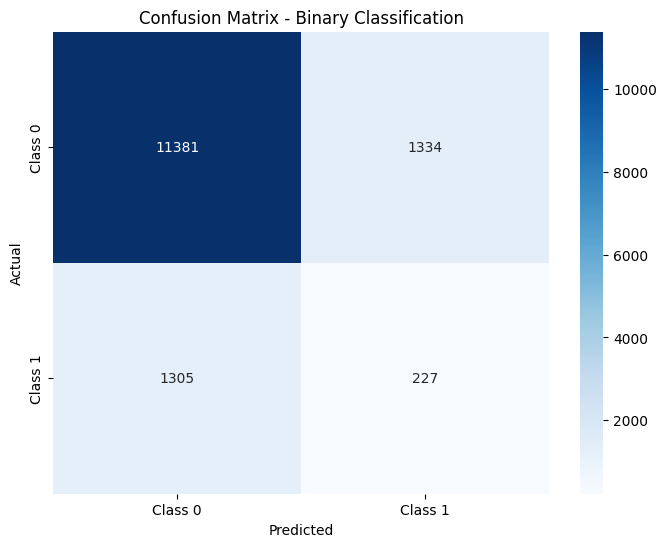

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val_bin, y_pred_adjusted_ensemble)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Binary Classification')
plt.show()

# Coclusion
Random Forest

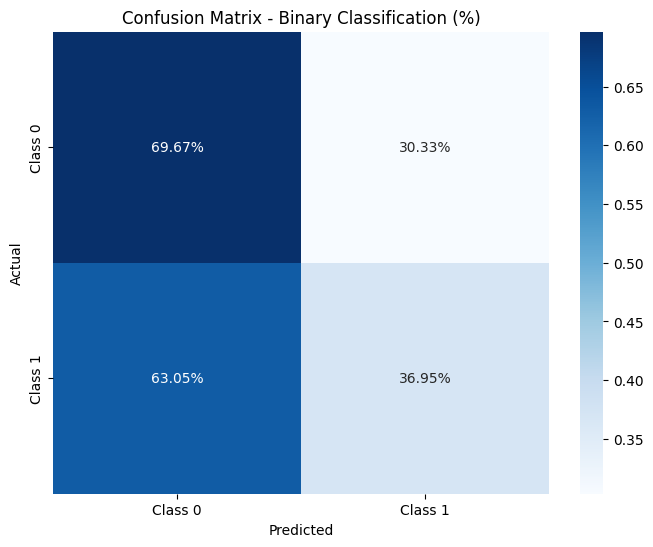

Random Forest Model (Binary) with Oversampling - Accuracy: 0.6614725907208535
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79     12715
           1       0.13      0.37      0.19      1532

    accuracy                           0.66     14247
   macro avg       0.51      0.53      0.49     14247
weighted avg       0.82      0.66      0.72     14247



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy=.5, random_state=42)

# Fit and transform the training data
X_train_bin_oversampled, y_train_bin_oversampled = oversampler.fit_resample(X_train_bin, y_train_bin)

# Random Forest for Binary Classification with oversampling
rf_model_bin_oversampled = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=20, max_depth=15, min_samples_split=10, min_samples_leaf=10)
rf_model_bin_oversampled.fit(X_train_bin_oversampled, y_train_bin_oversampled)

# Make predictions on the validation set
y_pred_rf_bin_oversampled = rf_model_bin_oversampled.predict(X_val_bin)

# Assuming y_pred_prob is the predicted probabilities for class 1 from Random Forest
y_pred_prob_oversampled = rf_model_bin_oversampled.predict_proba(X_val_bin)[:, 1]

# Adjust the threshold as needed
threshold = 0.5
y_pred_adjusted_oversampled = (y_pred_prob_oversampled > threshold).astype(int)

# Evaluate the Random Forest model with oversampling for Binary Classification
from sklearn.metrics import confusion_matrix

# ... (your previous code)

# Evaluate the Random Forest model with oversampling for Binary Classification
accuracy_rf_bin_oversampled = accuracy_score(y_val_bin, y_pred_adjusted_oversampled)
conf_matrix_rf_bin_oversampled = confusion_matrix(y_val_bin, y_pred_adjusted_oversampled)
classification_report_rf_bin_oversampled = classification_report(y_val_bin, y_pred_adjusted_oversampled)

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_bin_oversampled / conf_matrix_rf_bin_oversampled.sum(axis=1)[:, np.newaxis],
            annot=True, fmt=".2%", cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Binary Classification (%)')
plt.show()



# Print other results
print(f"Random Forest Model (Binary) with Oversampling - Accuracy: {accuracy_rf_bin_oversampled}")
print("Classification Report:\n", classification_report_rf_bin_oversampled)



#Test Data

In [ ]:
trying = pd.concat([X_test_bin, test_data['encounter_id']], axis=1)
print(trying)

       non_lab_procedures_scaled  number_diagnoses_scaled  \
0                       0.000000                 0.333333   
1                       0.166667                 0.400000   
2                       0.500000                 0.333333   
3                       0.166667                 0.533333   
4                       0.000000                 0.533333   
...                          ...                      ...   
30525                   0.000000                 0.533333   
30526                   0.000000                 0.533333   
30527                   0.500000                 0.333333   
30528                   0.500000                 0.266667   
30529                   0.166667                 0.466667   

       length_of_stay_in_hospital  additional_diagnosis_class  \
0                        0.153846                   25.683321   
1                        0.692308                    4.396839   
2                        0.076923                    3.529263   
3      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy=.5, random_state=42)

# Fit and transform the training data
X_train_bin_oversampled, y_train_bin_oversampled = oversampler.fit_resample(X_train_bin_scaled, y_train_bin)

# Standardize the oversampled data
scaler = StandardScaler()
X_train_bin_oversampled_scaled = scaler.fit_transform(X_train_bin_oversampled)

# Create and train the MLP model on the oversampled data
mlp_model_oversampled = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model_oversampled.fit(X_train_bin_oversampled_scaled, y_train_bin_oversampled)

# Make predictions on the validation set
y_pred_proba_oversampled = mlp_model_oversampled.predict_proba(X_val_bin_scaled)[:, 1]

# Adjust the threshold as needed
threshold = 0.3
y_pred_adjusted_oversampled = (y_pred_proba_oversampled > threshold).astype(int)

# Evaluate the performance of the adjusted model on the validation set
accuracy_adjusted_oversampled = accuracy_score(y_val_bin, y_pred_adjusted_oversampled)
classification_report_adjusted_oversampled = classification_report(y_val_bin, y_pred_adjusted_oversampled)

# Display the results
print(f"Acurácia da Rede Neural Ajustada com Oversampling: {accuracy_adjusted_oversampled}")
print("Relatório de Classificação Ajustado com Oversampling:\n", classification_report_adjusted_oversampled)

# Make predictions on the original test set using the Random Forest model
y_pred_prob_test = rf_model_bin.predict_proba(trying[final_features_binary])[:, 1]

# Adjust the threshold as needed
threshold_test = 0.3

# Create a binary vector
binary_vector_test = (y_pred_prob_test > threshold_test).astype(int)

# Map the binary values to 'Yes' and 'No'
result_vector_test = pd.DataFrame({
    'encounter_id': trying['encounter_id'],
    'Result': np.where(binary_vector_test == 1, 'Yes', 'No')
})

# Now, result_vector_test contains 'Yes' where y_pred_prob_test is 1, and 'No' where it's 0
print(result_vector_test)

# Save the results to a CSV file
result_vector_test.to_csv('result_predictions.csv', index=False)


Acurácia da Rede Neural Ajustada com Oversampling: 0.42584403734119464
Relatório de Classificação Ajustado com Oversampling:
               precision    recall  f1-score   support

           0       0.91      0.40      0.55     12715
           1       0.12      0.68      0.20      1532

    accuracy                           0.43     14247
   macro avg       0.52      0.54      0.38     14247
weighted avg       0.83      0.43      0.51     14247

       encounter_id Result
0            499502    Yes
1            447319    Yes
2            309126    Yes
3            181183    Yes
4            359339    Yes
...             ...    ...
30525        451150    Yes
30526        549298    Yes
30527        327586     No
30528        351214    Yes
30529        914270    Yes

[30530 rows x 2 columns]


In [ ]:
drive.mount('/content/gdrive')
# Make predictions on the original test set using the Random Forest model
y_pred_prob_test = rf_model_bin.predict_proba(trying[final_features_binary])[:, 1]

# Adjust the threshold as needed
threshold_test = 0.3

# Create a binary vector
binary_vector_test = (y_pred_prob_test > threshold_test).astype(int)

# Map the binary values to 'Yes' and 'No'
result_vector_test = pd.DataFrame({
    'encounter_id': trying['encounter_id'],
    'Result': np.where(binary_vector_test == 1, 'Yes', 'No')
})

# Now, result_vector_test contains 'Yes' where y_pred_prob_test is 1, and 'No' where it's 0
print(result_vector_test)

# Save the results to a CSV file
drive.mount('/content/gdrive')
result_vector_test.to_csv("/content/gdrive/MyDrive/ML Project/result_predictions.csv", index=False)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
       encounter_id Result
0            499502    Yes
1            447319    Yes
2            309126    Yes
3            181183    Yes
4            359339    Yes
...             ...    ...
30525        451150    Yes
30526        549298    Yes
30527        327586     No
30528        351214    Yes
30529        914270    Yes

[30530 rows x 2 columns]
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
